In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [10]:
raw_df= pd.read_csv("./files/training/AAPL_1d.csv")
raw_df.drop_duplicates(inplace=True)
raw_df.shape

(2489, 47)

In [20]:
buy_df= pd.read_csv("./files/xgb/buy_binary_output.csv")
sell_df= pd.read_csv("./files/xgb/sell_binary_output.csv")
print(buy_df.shape, sell_df.shape)

(396, 7) (397, 7)


In [21]:

col= 'close'
t= 0.5
x_buy= raw_df[raw_df.date.isin(buy_df[buy_df.prob>t].date)] 
x_sell= raw_df[raw_df.date.isin(sell_df[sell_df.prob>t].date)] 
trade_raw_df=raw_df[(raw_df.date>=min(x_buy.date.min(), x_sell.date.min())) & (raw_df.date<=max(x_buy.date.max(), x_sell.date.max()))]

In [24]:
# strategy#1: long or short on open, closeout on close
b_profit= [np.round((i.close-i.open),2) for ii,i in x_buy.iterrows()]
s_profit= [np.round((i.open-i.close),2) for ii,i in x_sell.iterrows()]

b_precision=100*np.sum([1 for i in b_profit if i>0])/ len(b_profit)
s_precision=100*np.sum([1 for i in s_profit if i>0])/ len(s_profit)

b_return= [100*np.round((i.close-i.open)/i.open,4) for ii,i in x_buy.iterrows()]
s_return= [100*np.round((i.open-i.close)/i.open,4) for ii,i in x_sell.iterrows()]

print("total$={}, return={}%, #trades={}, $/trade={}, std={}, $max={}, $min={}".format(np.round(np.sum(b_profit),2),np.round(np.sum(b_return),2),
                                                                                      len(b_profit), np.round(np.mean(b_profit),2), np.round(np.std(b_profit),2), np.max(b_profit), np.min(b_profit))
      ,'\n', b_profit)
print("*"*20,"shorts", "*"*20)
print("total$={}, return={}%. #trades={}, $/trade={}, std={}, $max={}, $min={}".format(np.round(np.sum(s_profit),2), np.round(np.sum(s_return),2), len(s_profit), np.round(np.mean(s_profit),2), np.round(np.std(s_profit),2), np.max(s_profit), np.min(s_profit))
      ,'\n', s_profit)
print("="*100)
print("precisions buy={:.2f}%, sell={:.2f}%".format(b_precision,s_precision))
print("overall $gain=", np.round(np.sum(b_profit+s_profit),2), "%return=", np.round(np.sum(b_return+s_return),2))


total$=24.73, return=14.42%, #trades=82, $/trade=0.3, std=2.17, $max=7.49, $min=-3.91 
 [4.17, 0.37, 0.89, 1.55, 2.26, 0.25, 0.4, -1.5, -2.1, 0.21, -3.2, -3.91, -0.18, 0.52, -3.59, -3.59, -2.43, 2.15, -3.25, 7.49, -3.16, -0.9, -3.61, -0.69, 2.04, -0.2, -0.91, -2.13, -2.72, 2.46, 0.93, -3.61, 1.61, -0.53, -2.1, 0.47, 2.71, 1.1, -1.6, 2.58, 0.79, 2.75, 1.45, 1.91, -0.84, 3.99, -2.89, 2.21, 0.2, 0.2, 0.2, 1.79, 3.68, -1.08, -1.46, -1.65, 2.45, 1.89, -0.97, -1.54, -1.54, 2.58, -0.73, -0.65, -1.08, 0.39, 0.77, 2.38, 1.35, -0.81, 3.69, 2.18, 0.29, 1.6, 1.6, 0.64, 0.5, 1.31, 1.27, 2.97, 2.05, 2.64]
******************** shorts ********************
total$=26.67, return=16.81%. #trades=59, $/trade=0.45, std=2.41, $max=6.02, $min=-7.94 
 [-1.66, -1.31, 3.91, 1.93, -1.13, 6.02, 0.97, -2.18, 0.0, -7.94, 5.89, -1.33, 3.69, 3.69, -1.8, 3.61, 2.14, 3.1, 4.14, 1.24, 4.58, 0.32, -2.98, -0.06, -2.65, -2.32, -0.1, -2.22, 1.27, 1.27, -0.54, 0.1, 1.09, -0.08, -2.04, -0.22, 1.57, 0.76, -2.16, 1.32, 0.24, -0.

<Figure size 2400x1200 with 0 Axes>

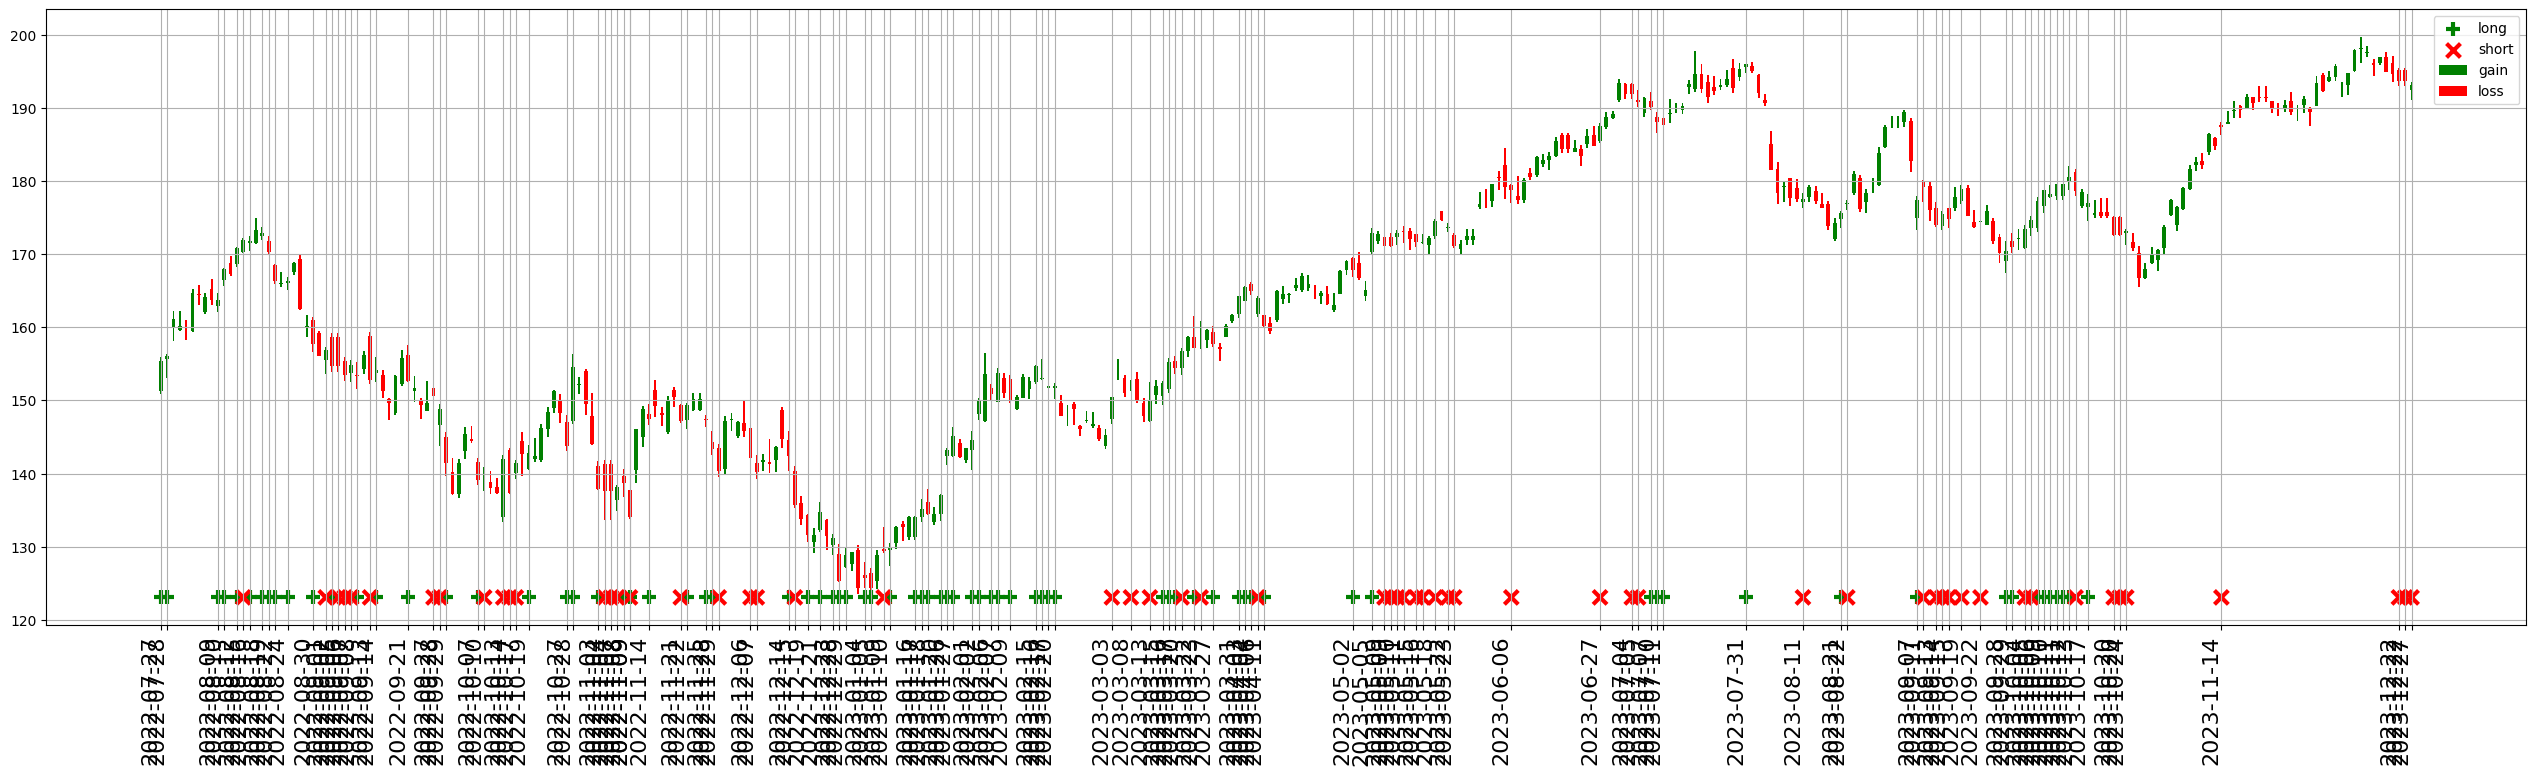

In [18]:
plt.figure(figsize=(24,12))
fig, ax = plt.subplots(figsize=(32,8))


width = 0.6
width2 = 0.3

#define up and down prices
up = trade_raw_df[trade_raw_df.close>=trade_raw_df.open]
down = trade_raw_df[trade_raw_df.close<trade_raw_df.open]

#define colors to use
col1 = 'green'
col2 = 'r'

#plot up prices
plt.bar(up.index, up.close-up.open, width,  bottom=up.open,  color=col1, label='gain')
plt.bar(up.index, up.high-up.close, width2, bottom=up.close, color=col1)
plt.bar(up.index, up.low-up.open,   width2, bottom=up.open,  color=col1)

#plot down prices
plt.bar(down.index,down.close-down.open,width,bottom=down.open,  color=col2, label='loss')
plt.bar(down.index,down.high-down.open,width2,bottom=down.open,  color=col2)
plt.bar(down.index,down.low-down.close,width2,bottom=down.close, color=col2)

plt.scatter(x_buy.index, [x_buy.low.min()-1]*len(x_buy),  marker='+', 
            sizes=[100]*len(x_buy[col]), color='g', label='long', linewidths=3)
plt.scatter(x_sell.index, [x_buy.low.min()-1]*len(x_sell),  marker='x', 
            sizes=[100]*len(x_sell[col]), color='r', label='short', linewidths=3)
#rotate x-axis tick labels
plt.xticks(rotation=90, ha='right')
ax.set_xticks(list(x_buy.index) + list(x_sell.index), minor=False, color='g')
ax.set_xticklabels( list(x_buy.date) + list(x_sell.date), size=16 )
plt.grid()
plt.legend()

#display candlestick chart
plt.show()

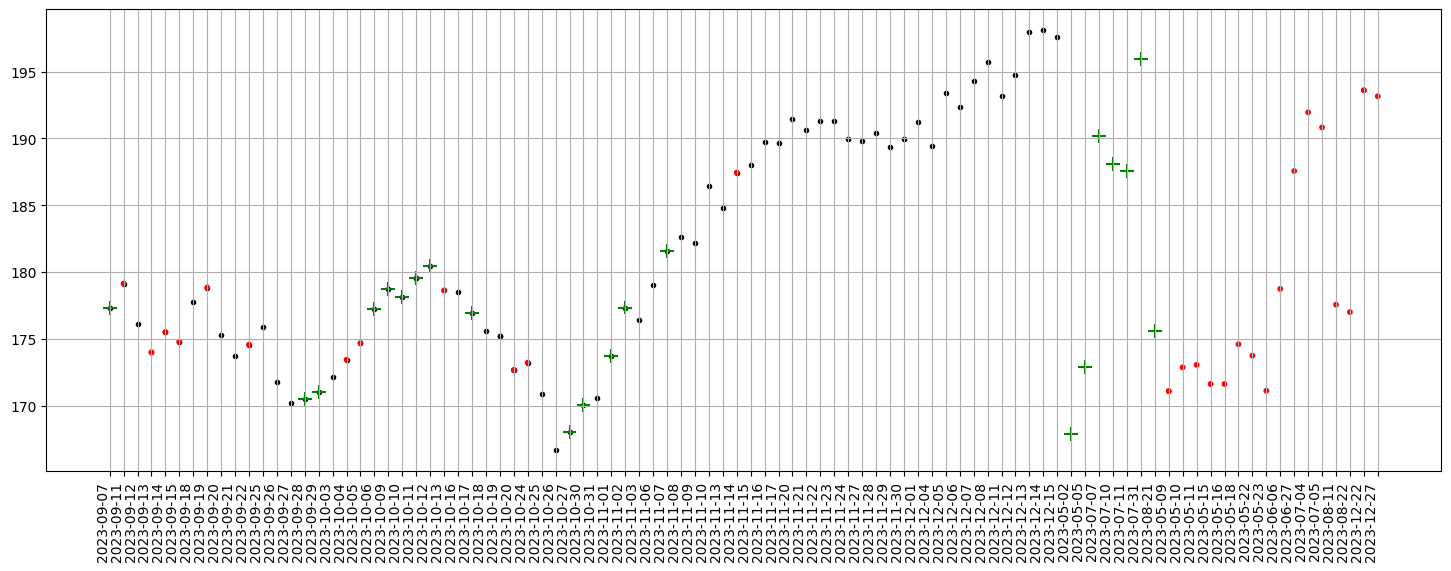

In [155]:
plt.figure(figsize=(18,6))
plt.scatter(x.date, x[col],  marker='.', color='black')
plt.scatter(x_buy.date, x_buy[col],  marker='+', sizes=[100]*len(x_buy[col]), color='g')
plt.scatter(x_sell.date, x_sell[col],  marker='o', sizes=[10]*len(x_sell[col]), color='r')
plt.xticks(rotation=90, ha='right')
plt.grid()
plt.show()

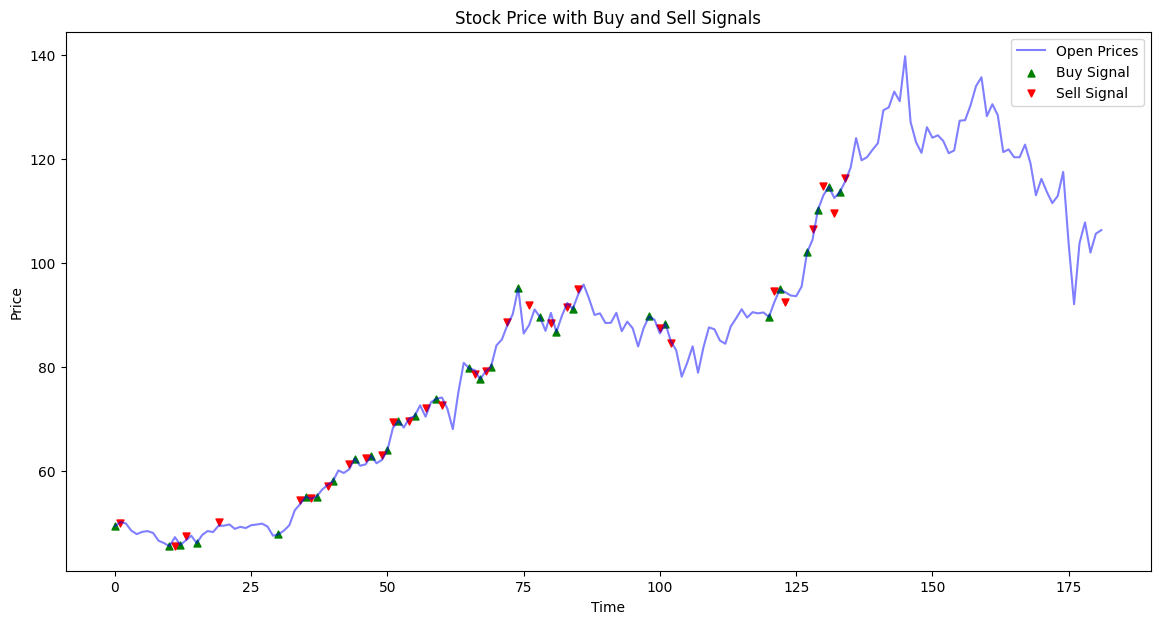

In [9]:
# Sample data continued
prices = [
    [49.30130154,	50.39806366],
[50.11512623,	49.9331665],
[49.84118417,	48.70542908],
[48.45948613,	47.76563644],
[47.78962761,	48.23153305],
[48.22553404,	47.81062317],
[48.36850512,	48.12955475],
[48.0135791,	46.75985336],
[46.51490651,	46.75485229],
[46.06700037,	45.50012207],
[45.46012966,	46.55998993],
[47.20890845,	45.49712753],
[45.6941044,	46.58998871],
[46.58898856,	47.4998703],
[47.48487388,	46.62098312],
[46.04006001,	47.6508522],
[47.62285812,	48.08179855],
[48.38375338,	48.34375763],
[48.18778056,	48.88368988],
[49.39362679,	50.07053757],
[49.41762195,	49.59759903],
[49.64858915,	48.10478973],
[48.80470297,	48.98368073],
[49.18865455,	48.82370377],
[48.96167954,	49.27264023],
[49.50461128,	49.41062164],
[49.63659633,	49.51560974],
[49.80657256,	49.51560974],
[49.23764652,	48.16178513],
[47.4788736,	47.5628624],
[47.76083683,	47.99180984],
[48.45574754,	49.09066391],
[49.50561405,	52.24625778],
[52.3942413,	53.13314438],
[53.6090844,	54.34298706],
[54.99190527,	54.81492615],
[54.61294954,	54.70293808],
[55.01090292,	56.37472534],
[56.33972952,	56.04576874],
[57.25260858,	57.09962845],
[57.98151702,	59.48332596],
[60.04125459,	59.64630508],
[59.56231403,	59.86527634],
[60.29622184,	61.35408401],
[62.34195021,	61.60904694],
[60.95213471,	61.02312469],
[61.22409709,	62.4569397],
[62.89188285,	62.76589584],
[61.43206766,	61.51905823],
[62.09198516,	63.01886749],
[63.96574381,	66.15146637],
[68.21619959,	69.32305908],
[69.62101914,	68.21420288],
[68.31018155,	70.08995056],
[70.06495419,	69.63201141],
[70.52389573,	72.12369537],
[72.59062993,	72.23867798],
[70.39091666,	72.11869049],
[73.19255681,	73.89046478],
[73.85947049,	72.64862061],
[74.09043772,	72.60363007],
[71.93771202,	69.44303894],
[67.99722267,	67.46329498],
[75.0153156,	78.52786255],
[80.77956853,	78.80682373],
[79.68971803,	79.08180237],
[79.37075424,	78.69084167],
[77.6099909,	77.65298462],
[79.08379596,	79.10179138],
[79.98967404,	82.26837921],
[84.11913855,	85.22599792],
[85.26299643,	85.9569397],
[88.01477279,	88.69271088],
[90.15058931,	92.66138458],
[95.13018874,	87.52081299],
[86.42190515,	85.76696014],
[88.04176803,	91.90544891],
[91.04752505,	90.88053894],
[89.56964428,	87.93677521],
[86.92285742,	87.82978058],
[90.38057858,	88.44773865],
[86.69287897,	89.39066315],
[89.7896209,	90.36457825],
[92.29242471,	91.42749023],
[91.13351355,	94.28125763],
[93.93328419,	94.99419403],
[95.84312895,	92.55339813],
[93.10434857,	90.24258423],
[89.99260585,	90.34857941],
[90.29158546,	90.35557556],
[88.4407334,	89.44465637],
[88.47673163,	88.95668793],
[90.39857128,	85.89794159],
[86.85886603,	88.0007782],
[88.69271188,	87.12584686],
[87.43481841,	85.34698486],
[83.91910944,	87.03185272],
[87.41281451,	90.60855103],
[89.69163298,	88.17875671],
[89.09068034,	85.99393463],
[86.42590005,	87.40782166],
[88.33273802,	84.02809906],
[84.96301864,	84.66403961],
[83.14317482,	76.19374084],
[78.09758165,	79.51146698],
[80.76236572,	82.41622925],
[83.94309987,	79.67045593],
[78.86151536,	82.62521362],
[83.8111129,	87.72779083],
[87.58780475,	87.74979401],
[87.23283371,	86.39490509],
[85.07001557,	83.03417969],
[84.44206031,	85.80995178],
[87.78178991,	88.78170776],
[89.38265691,	92.13243103],
[91.09051623,	90.54656219],
[89.47565458,	90.40457916],
[90.52156696,	88.73971558],
[90.29757996,	89.8706131],
[90.47056694,	90.39157867],
[89.59163608,	91.34849548],
[92.46440306,	94.6222229],
[94.90220693,	94.35124969],
[94.36124912,	92.4713974],
[93.74230259,	94.7722168],
[93.59131043,	95.3781662],
[95.45116059,	94.94219971],
[102.0196232,	103.7904816],
[104.4404201,	106.4602585],
[110.23495,	113.8916473],
[113.0407189,	114.815567],
[114.6405816,	110.490921],
[112.5107569,	109.6240005],
[113.6116703,	114.9905548],
[115.7064954,	116.4274292],
[118.3612808,	122.4299469],
[124.0378048,	120.98806],
[119.7601626,	120.8780746],
[120.3601172,	121.7799988],
[121.7699966,	120.9100037],
[123.0599976,	125.1999969],
[129.3899994,	129.6100006],
[129.9600067,	131.8800049],
[132.9900055,	130.9799957],
[131.1399994,	135.5800018],
[139.8000031,	130.7799988],
[127.1200027,	126.5699997],
[123.2399979,	118.1100006],
[121.1999969,	126.0899963],
[126.1299973,	126.4000015],
[124.0999985,	123.9899979],
[124.5800018,	123.5400009],
[123.4700012,	124.3000031],
[121.1299973,	122.6699982],
[121.6600037,	128.2799988],
[127.3799973,	125.8300018],
[127.4899979,	128.1999969],
[130.3500061,	131.3800049],
[134.0299988,	134.9100037],
[135.75,	127.4000015],
[128.2599945,	129.2400055],
[130.5599976,	128.4400024],
[128.4400024,	126.3600006],
[121.3499985,	117.9899979],
[121.8499985,	121.0899963],
[120.3499985,	117.9300003],
[120.3499985,	123.5400009],
[122.7799988,	122.5899963],
[119.1699982,	114.25],
[113.0400009,	112.2799988],
[116.1900024,	113.0599976],
[113.6900024,	111.5899963],
[111.5199966,	103.7300034],
[112.9000015,	117.0199966],
[117.5299988,	109.2099991],
[103.7600021,	107.2699966],
[92.05999756,	100.4499969],
[103.8399963,	104.25],
[107.8099976,	98.91000366],
[102,	104.9700012],
[105.6399994,	104.75],
[106.3199997,	110.3001022],
]

# Buy and sell signals
buy_signals = [0, 10, 12, 15, 30, 35, 37, 40, 44, 47, 50, 52, 55, 59, 65, 67, 69, 74, 78, 81, 84, 98, 101, 120, 122, 127, 129, 131, 133]
sell_signals = [1, 11, 13, 19, 34, 36, 39, 43, 46, 49, 51, 54, 57, 60, 66, 68, 72, 76, 80, 83, 85, 100, 102, 121, 123, 128, 130, 132, 134]

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(list(zip(*prices))[0], label='Open Prices', color='blue', alpha=0.5)
plt.scatter(buy_signals, [prices[i][0] for i in buy_signals], marker='^', color='green', label='Buy Signal', s=25)
plt.scatter(sell_signals, [prices[i][1] for i in sell_signals], marker='v', color='red', label='Sell Signal', s=25)
plt.title('Stock Price with Buy and Sell Signals')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [15]:
data=[
[3.83237744,3.742645408,3.764519215,],
[3.9248437,3.724003156,3.878859043,100],
[3.801804009,3.686469841,3.730217218,41.66665887],
[3.768993084,3.663601523,3.697903395,36.66006778],
[4.015320869,3.899489619,3.966105223,69.46027666],
[4.260903555,4.063294255,4.244995117,80.66986444],
[4.240024343,4.151534928,4.172663212,73.16865289],
[4.311363222,4.217157083,4.256181717,75.94952625],
[4.30837932,4.223121381,4.262394905,76.14758208],
[4.240272294,4.017806403,4.037691593,57.65554617],
[4.140597801,4.074230868,4.112509727,61.04747197],
[4.153523535,3.99245361,4.021784306,55.26628656],
[4.064080922,3.956096887,4.011332989,54.62453977],
[4.187491361,4.099412196,4.155146122,61.28618642],
[4.251187214,4.149672034,4.167835236,61.81881852],
[4.128026101,4.061842617,4.084733009,56.35082818],
[4.206400967,4.145442032,4.198936462,61.40334704],
[4.47835239,4.299457193,4.472132206,70.26915885],
[4.505721414,4.406943536,4.445011616,68.58490596],
[4.57762832,4.474620126,4.49104166,69.90342546],
[4.584345452,4.448494676,4.557723045,71.75298636],
[4.63460556,4.543291723,4.586336136,72.53300949],
[4.68760268,4.57688178,4.584843636,72.42067016],
[4.555235282,4.483079811,4.526870728,68.01419781],
[4.518410899,4.441279567,4.48382616,64.85865283],
[4.50945359,4.444016134,4.505223751,65.71031911],
[4.513931739,4.391516514,4.478102684,63.60616831],
[4.50248755,4.39176617,4.402465343,58.02561574],
[4.425107765,4.286520104,4.296720982,51.25511436],
[4.39574755,4.293237169,4.350214958,54.16849694],
[4.411173472,4.25715948,4.292739391,50.66471454],
[4.454217452,4.247455061,4.434561253,57.90087249],
[4.43356661,4.361411137,4.412417412,56.50723788],
[4.421374837,4.212870754,4.273581028,48.60766513],
[4.341257468,4.268106825,4.331056118,51.62276444],
[4.503482735,4.32458752,4.329314709,51.52413199],
[4.319361869,4.233024367,4.305428505,50.10986067],
[4.517415367,4.279552058,4.511195183,60.23564342],
[4.556976223,4.448245685,4.527616501,60.91737786],
[4.686109177,4.583847967,4.586336136,63.33784547],
[4.494525365,4.391517637,4.409680843,52.75287392],
[4.545781078,4.457701884,4.496267319,56.58284798],
[4.604997113,4.488802529,4.553990841,58.97067184],
[4.710989839,4.619178663,4.62763834,61.85329486],
[4.661973746,4.58782795,4.641073704,62.37266032],
[4.958558081,4.717459613,4.885904789,70.30643972],
[4.956817134,4.820717182,4.83216238,66.96847114],
[4.921733571,4.779662137,4.834152222,67.03088491],
[4.86724425,4.665209508,4.739603996,61.1212134],
[4.890382462,4.782149289,4.876946449,65.83343598],
[5.039173012,4.859282631,4.866995811,65.21669517],
[4.86823983,4.75304041,4.854057789,64.37227867],
[4.93168613,4.861272806,4.898097038,65.98665207],
[5.110083855,4.970998406,5.089183807,71.93002934],
[5.197665189,5.103614503,5.145166397,73.3966804],
[5.137703417,5.029470659,5.048877716,66.92006468],
[5.081470172,4.982691831,5.050866127,66.98485357],
[5.050866294,4.921733527,5.001601696,63.65823883],
[5.073011829,4.941141715,5.04066658,65.13677256],
[5.249915284,5.098638156,5.237474442,71.44072621],
[5.263350875,5.167309852,5.215330601,69.90902568],
[5.216823289,5.078484346,5.16606617,66.49338895],
[5.267332699,5.138945944,5.183732033,67.11388226],
[5.201397593,5.129242128,5.169798374,66.07454671],
[5.202889985,5.082714244,5.179750919,66.47392078],
[5.271313204,5.182984886,5.215330601,67.92750286],
[5.211597492,5.123020984,5.189453602,65.69652268],
[5.222049503,5.138448833,5.219810009,67.06315958],
[5.269322229,4.992146538,5.080474854,56.02934753],
[5.30838644,5.070025752,5.28176403,64.99063166],
[5.27429877,5.116801456,5.175023079,58.21517077],
[5.338244357,5.139444259,5.254395008,61.43478878],
[5.305648359,5.207865673,5.229512215,59.8771606],
[5.298682652,5.223541666,5.247179031,60.64019862],
[5.508929318,5.362379337,5.50395298,69.66881556],
[5.491013051,5.392732537,5.39920187,63.29059057],
[5.479129038,5.407667859,5.43406105,64.45675997],
[5.431571417,5.372808639,5.396712303,62.1776661],
[5.403185914,5.195026206,5.210214615,52.24394809],
[5.174608837,4.989108013,5.17062521,50.40307172],
[5.276697628,5.185814584,5.214448929,52.40241996],
[5.252045774,5.16688934,5.197515965,51.53791213],
[5.315788608,5.256776505,5.282920837,55.52341699],
[5.337699981,5.251298781,5.282920837,55.52341699],
[5.379780529,5.260262694,5.327989578,57.65473482],
[5.417129334,5.335957001,5.411651134,61.3566524],
[5.597402625,5.373805605,5.579226017,67.48773042],
[5.701481829,5.523201216,5.577233315,67.35088709],
[5.67857482,5.59665542,5.606117249,68.35258245],
[5.706959322,5.615329252,5.6843009,70.95062004],
[5.775184016,5.710694186,5.714678288,71.91532759],
[5.876276569,5.744309172,5.862830639,76.08639058],
[5.985583763,5.910138491,5.960186481,78.36074359],
[6.02094205,5.93578608,5.946492672,77.24786908],
[5.958693283,5.896693454,5.941512585,76.82057923],
[5.98384275,5.92607587,5.955706596,77.20755158],
[5.984340421,5.871545535,5.897939205,71.943375],
[5.881257087,5.753273781,5.784646988,62.88737999],
[5.868309447,5.730117261,5.858847618,65.91371652],
[5.973633289,5.894204372,5.973633289,69.99051227],
[5.921842558,5.82896724,5.878019333,63.20885947],
[5.907899251,5.758502756,5.902670383,64.17270887],
[6.019946626,5.885987412,5.974131584,66.8813883],
[6.026669527,5.929810576,5.985336304,67.29885512],
[6.123528257,5.997287921,6.05107069,69.71103956],
[6.18876518,6.069247799,6.083440304,70.85128047],
[6.299318351,6.143945484,6.274169922,76.47169346],
[6.256741418,6.143946519,6.157143593,67.82961463],
[6.19224989,6.08866799,6.114563465,64.95336084],
[6.204202368,6.144692541,6.198226452,67.83903941],
[6.224868876,6.159383133,6.206941128,68.13337328],
[6.207190226,6.13946334,6.173575878,65.655879],
[6.314258279,6.199969769,6.227608204,67.70395504],
[6.304546986,6.178804847,6.296081066,70.13454815],
[6.461413579,6.182539266,6.236820221,65.53742302],
[6.03189842,5.782405458,5.980854511,50.22421691],
[6.20669267,5.993552922,6.174323559,58.17834177],
[6.195985462,6.073977619,6.113817215,55.20706529],
[6.133985116,5.960933858,6.120539188,55.47910119],
[6.086675244,5.845150561,5.886981487,45.20612923],
[6.003512174,5.862581156,5.984090805,49.40136954],
[6.172579606,6.075969528,6.15340662,55.76125079],
[6.284627084,6.160378573,6.243792057,58.74250314],
[6.330692291,6.196982402,6.330692291,61.43350061],
[6.312764176,6.239061372,6.264459133,58.31169894],
[6.548561897,6.282137584,6.547815323,66.22027181],
[6.785106235,6.594127232,6.670319557,68.96174672],
[6.792577356,6.684264291,6.786103249,71.33004355],
[6.809507744,6.700696979,6.742279053,69.17844663],
[7.344597799,7.121249676,7.21561861,77.18372851],
[7.402863022,7.092864354,7.384437084,79.25339773],
[7.853543911,7.506943152,7.835865021,83.55039347],
[7.876202396,7.378959915,7.686468601,77.80694478],
[7.599320241,7.237281739,7.322188854,65.90954443],
[7.018415013,6.67305904,6.804528236,53.4110054],
[6.941725774,6.423069573,6.524908543,48.1045512],
[6.858559895,6.523662153,6.664343834,50.73311434],
[6.652136319,6.200936917,6.293369293,44.30352152],
[6.78816881,6.02404528,6.72862339,51.99121574],
[6.915979711,6.502650241,6.887078762,54.45583528],
[7.002682212,6.539025761,6.624482155,49.88528526],
[7.097854977,6.657119519,7.088387489,56.7857174],
[7.055749103,6.764250972,6.808847904,52.1279253],
[6.686767569,6.427906914,6.628218651,49.31321468],
[6.462787662,5.934104799,6.114983082,42.32075374],
[6.504643917,6.128686341,6.504643917,48.31316198],
[6.393027734,6.04347913,6.140645027,43.74150608],
[5.882779758,5.376519962,5.389226437,36.13908697],
[6.004860723,5.4714444,6.000376225,44.57638413],
[5.633138846,4.833387374,4.893181801,35.44086147],
[5.502587944,4.75864483,5.413145065,41.5038823],
[5.230523319,4.501529095,5.053133011,38.78772624],
[5.399691478,4.818190175,5.306013584,41.67510065],
[5.738277813,5.110685033,5.126132011,40.22171435],
[5.393461872,4.945999522,5.299036026,42.30452247],
[6.294865648,5.68172282,6.208163261,51.81170147],
[6.523079762,6.070634834,6.119467258,50.92994797],
[6.533046101,6.22859247,6.40897274,53.69969809],
[6.555468623,6.195705086,6.296608448,52.46197102],
[6.626226213,6.318035093,6.617007732,55.60423379],
[6.861416759,6.421677867,6.567427158,54.99839643],
[6.515855821,6.011339872,6.055936337,49.05978622],
[6.378078854,6.037001256,6.364874363,52.40277294],
[6.368860907,5.939337373,6.076864719,49.16357359],
[6.723889451,6.30159054,6.68701601,55.44673393],
[6.932423838,6.410467467,6.453569412,52.75989431],
[6.675805292,6.492684525,6.650890827,54.75562406],
[6.799629979,6.488200346,6.551233768,53.52571811],
[6.73186166,6.402992112,6.72314167,55.38726704],
[7.108567703,6.823796551,7.074435234,59.00129068],
[7.07991696,6.860919705,6.996952057,57.88741121],
[7.449396035,7.139212416,7.342264175,61.38613046],
[7.445908329,7.148929188,7.282968521,60.45728908],
[7.312367294,7.107322052,7.151669502,58.35181938],
[7.094864649,6.654877183,6.714671612,51.87633639],
[7.172100127,6.861417986,7.129247189,56.77686658],
[7.303397363,7.050765696,7.075929165,55.98722799],
[7.216945474,6.990972236,7.214952469,57.64145909],
[7.561510595,7.324823914,7.401560307,59.82423224],
[7.578951957,7.253570321,7.259051323,57.39194104],
[7.488762045,7.318596745,7.435943604,59.5882691],
[7.435943226,7.268020422,7.281972408,56.84171646],
[7.197760554,6.996950815,7.045284748,52.8119474],
[7.271009555,6.9979479,7.257306576,55.83262388],
[7.481037778,7.257306563,7.318346977,56.69215232],
[7.524139382,7.359953597,7.419249535,58.14227178],
[7.658926907,7.507198567,7.595644474,60.62444723],
[7.79196935,7.633514032,7.785740852,63.15986996],
[8.084714128,7.752107005,8.037875175,66.26282342],
[8.144506034,7.766057033,7.775773525,60.5531254],
[8.050828834,7.568735936,7.753351688,60.07622035],
[8.008474585,7.661168049,8.002993584,63.52105654],
[8.471382124,7.847028482,8.461666107,68.84082585],
[8.885962448,8.650770651,8.720281601,71.37551512],
[9.056374768,8.732737096,8.775341034,71.89961367],
[9.012025652,8.858303853,8.939275742,73.45785647],
[9.021493184,8.707572539,8.745193481,68.60728732],
[9.061854607,8.683405095,8.995332718,71.24289228],
[9.150301486,8.642297088,8.687890053,64.1177027],
[8.603181765,7.96936043,8.496050835,60.07992673],
[8.73049424,8.350549685,8.457931519,59.28106312],
[8.845097542,8.455935094,8.845097542,64.45123084],
[8.810466846,8.659735048,8.7760849,62.91768406],
[8.806979083,8.628343313,8.795020103,63.1765745],
[8.835881727,8.670200931,8.739462852,61.81298291],
[8.916686554,8.65172595,8.740462303,61.82894419],
[8.970272202,8.68213118,8.893501282,64.2902425],
[8.863345194,8.659951594,8.778847694,61.11102722],
[9.08269258,8.725257846,9.01913166,65.01558066],
[9.471782673,9.126311468,9.338928223,69.41669806],
[9.233739519,8.75990193,8.770121574,55.93742902],
[9.1599603,8.677397769,8.905966759,58.03333186],
[9.154974484,8.717776629,9.146499634,61.52324509],
[9.239226881,8.812497648,9.041564941,59.20993395],
[9.271376384,9.043305676,9.208563805,61.67941688],
[9.254928695,9.087427481,9.190620422,61.25033952],
[9.41694322,9.199840452,9.233738899,61.93560376],
[9.502936346,9.245702391,9.498449326,65.92016061],
[9.613856695,9.379555109,9.421928406,63.83976384],
[9.528112545,9.11733575,9.208065987,58.30181469],
[9.476766853,9.154975445,9.461811066,62.46255179],
[9.471780198,9.097894138,9.127804756,54.72223598],
[9.177157385,8.873561352,9.172670364,55.51959022],
[9.497952682,9.238974841,9.469537735,60.47897827],
[9.54730558,9.385038786,9.501690865,60.98634435],
[9.708575129,9.54979792,9.583697319,62.31517381],
[9.879314915,9.683647928,9.8100214,65.7794101],
[10.04008723,9.821488771,9.8424263,66.25768812],
[10.19462868,9.935898983,10.18565464,70.8973157],
[10.53860092,10.20310034,10.47778225,74.15466679],
[10.62359693,10.34791856,10.44812012,73.25806131],
[10.76018997,9.995219119,10.02238846,61.72281461],
[10.37184886,9.756431951,10.34617519,66.09539626],
[10.40200818,10.02587909,10.19686985,62.54720655],
[10.17643045,9.866105292,10.10464478,60.39063646],
[10.21805726,10.05778532,10.17119694,61.42427245],
[10.49996867,10.12658079,10.47952938,65.86823365],
[10.52863209,10.2561932,10.29781914,61.38045811],
[10.57100675,10.26093066,10.40774345,63.02180315],
[10.51566917,10.00145132,10.09965897,55.85660732],
[10.33396411,9.747960388,10.16421986,56.96090146],
[10.41073411,10.18739949,10.39054489,60.67486043],
[10.35116042,10.17892405,10.18515491,55.95585172],
[10.48501486,10.31626802,10.43441582,60.01978627],
[10.59144398,10.26466738,10.58247089,62.24797787],
[10.73451836,10.40200817,10.58321857,62.25941701],
[11.06578288,10.68342192,10.97754574,67.80085964],
[11.19439793,10.87360399,11.19439793,70.37681201],
[11.33797097,11.13308174,11.25322342,71.05332888],
[11.32426159,11.14554427,11.30182838,71.62984087],
[11.47057554,11.00471362,11.16623211,67.58578724],
[11.37436134,10.82425015,11.13183403,66.55918542],
[11.10367,10.76368234,10.81777191,57.91015488],
[11.43293923,10.92570042,11.40626907,66.65422686],
[11.68693236,11.32201934,11.40900993,66.68893665],
[11.66998447,11.40651955,11.5296526,68.25526124],
[12.37288704,11.78214732,12.30035305,76.01439626],
[12.4588826,12.05034972,12.2243309,74.09066566],
[12.27841878,12.06206336,12.1024437,70.98867733],
[12.33823882,11.84346283,12.10493374,71.01537527],
[12.77070321,12.15902495,12.64582539,76.14978605],
[12.87414377,12.47034614,12.6824646,76.45405636],
[12.72334381,12.53640076,12.71212769,76.71307694],
[12.8302751,12.64009159,12.73505878,76.92440845],
[12.81182888,12.52917036,12.59073734,72.46699361],
[13.1089451,12.6049468,13.10869598,77.50495337],
[13.5346751,12.99902145,13.33477116,79.28649934],
[13.95635601,13.40059505,13.78406811,82.28861809],
[14.68739947,13.86285785,14.30816555,85.01663457],
[13.84739891,12.84433666,12.98072147,59.86540005],
[13.13979526,11.67347378,12.58877182,54.71803874],
[12.51646537,11.67297544,11.88116741,46.88102215],
[12.77502243,12.19906522,12.68102455,54.76741227],
[13.030336,12.13448583,12.2788496,50.69214159],
[12.61869112,11.86396314,12.1319952,49.25100234],
[13.27941934,12.59749725,12.83785248,55.76105736],
[13.26321481,12.79347363,12.95628738,56.76326472],
[13.05776384,12.48031149,12.48105907,51.70191073],
[12.55610679,12.00258961,12.4301939,51.1759322],
[12.59874445,11.95671537,12.15667915,48.32877087],
[12.48903874,11.87269007,12.4838028,51.7838256],
[12.61420277,12.12301943,12.60398006,53.02649105],
[12.69299496,12.04697578,12.09135628,47.41315044],
[12.53591093,11.98189534,12.31500244,49.90471825],
[12.8490731,12.21302761,12.83934879,55.25725507],
[13.01687342,12.71592957,13.00016785,56.78245531],
[13.40682983,12.8986917,13.19040966,58.581142],
[13.58609888,13.11511082,13.49434471,61.3488326],
[13.72597371,13.42478065,13.57812023,62.10058183],
[13.48337444,13.01612618,13.02734661,54.58406047],
[13.60779009,13.1874162,13.60604477,60.05483812],
[14.10421165,13.628486,13.69979477,60.87703604],
[14.08152295,13.82645568,13.92668724,62.86900368],
[14.04686589,13.72123837,13.80177212,61.02674606],
[13.7873103,13.62424735,13.72597408,59.88011418],
[14.3086643,13.87532556,14.18798733,64.28500868],
[14.31015979,13.98129085,14.21017742,64.48668571],
[14.30442286,13.92269609,14.05758476,61.89821539],
[13.9683245,13.73096055,13.93267059,59.78272251],
[14.08376638,13.75564502,13.77459431,57.12213485],
[13.94613555,13.37092682,13.46168423,52.17241793],
[13.76287537,13.47090728,13.6090374,54.18568659],
[13.75464782,13.44148673,13.48861027,52.24989643],
[13.5753769,13.19639221,13.32529736,49.65898595],
[13.55692729,13.25573423,13.55393505,53.16076516],
[13.65616105,13.00365915,13.10613441,46.35898932],
[13.40608332,13.15625198,13.36095428,50.25910888],
[13.22456777,12.57530731,12.59325886,40.66611798],
[13.15749661,12.71592974,12.98919773,46.35340662],
[12.90193199,12.26713337,12.50050831,41.1150741],
[12.80244798,12.36187884,12.54713249,41.79094684],
[13.06998008,12.56907248,12.98470879,47.84172513],
[13.79055198,13.30136219,13.75739002,56.45039724],
[14.30068345,13.95361379,14.12216187,59.82178862],
[14.54976754,13.85787187,14.52308941,63.19441312],
[14.65224049,13.57437901,13.59432507,52.25217654],
[13.57014201,12.59450642,12.73587799,44.57032527],
[13.39910065,12.9136507,13.38214588,50.47346655],
[13.72921417,13.28041685,13.42079067,50.810811],
[13.63222541,13.02435413,13.26146889,49.31931676],
[13.61302743,13.12084634,13.47913647,51.41752393],
[13.55991788,13.26819995,13.38638306,50.45886482],
[13.5693961,13.14977067,13.392869,50.52832523],
[13.45145855,13.06499423,13.40433502,50.66002803],
[13.4584401,13.03008723,13.05277729,46.56665045],
[13.34674126,12.98072226,13.10488987,47.24709596],
[13.1268279,12.85056863,12.92312431,45.09025866],
[13.23404277,12.98521013,13.19938564,48.90785162],
[13.37167283,13.13530567,13.22581291,49.27119041],
[13.37666147,12.93758745,13.36569023,51.24740908],
[13.49260163,13.1929037,13.3542223,51.07174476],
[13.6369615,13.19888528,13.5083065,53.38384038],
[13.62752328,13.29731086,13.364151,50.95771206],
[13.52776207,13.35691886,13.52601624,53.51245722],
[13.69860327,13.46790326,13.57439899,54.27913527],
[13.56641948,13.24992349,13.31826115,49.61415465],
[13.382107,12.83765489,12.90000629,43.10015578],
[13.03768008,12.81895066,12.94140911,43.88555477],
[12.98904435,12.79251223,12.9823103,44.6976621],
[13.35691887,13.04640912,13.27710915,50.28263938],
[13.43198773,13.15539758,13.3287344,51.21184828],
[13.40530444,13.18108825,13.21101761,48.96461305],
[13.34769215,13.1471698,13.30953312,50.90619474],
[13.37312834,13.03942428,13.24044514,49.4844056],
[13.33821286,12.93666965,13.30055237,50.77259696],
[13.30554,13.02296358,13.24668026,49.55291649],
[13.24343823,12.97408065,12.97832012,43.89599323],
[13.10127745,12.90798865,12.96285725,43.5872288],
[13.03144348,12.73290531,12.86932945,41.67763682],
[13.04141977,12.81171684,12.91247654,42.92003413],
[13.18233536,12.86608956,13.11449718,48.45644963],
[13.1197335,12.88429453,13.02396202,46.28957213],
[13.62004115,12.9316811,13.08232212,47.90671334],
[13.41153755,13.05588546,13.37287998,55.14737831],
[13.21351172,12.55607895,12.5845108,39.21891292],
[13.34594236,12.85586036,13.31227207,52.77816924],
[13.3890909,13.01099227,13.24518394,51.63463304],
[13.92780841,13.33073109,13.58911514,56.8020055],
[13.72179745,13.31327096,13.45268822,54.32270117],
[13.59260705,13.35317787,13.49957848,55.0489299],
[13.56741722,13.14916442,13.16886711,49.11748737],
[13.29356948,12.81795351,12.82892704,43.88330663],
[13.0628687,12.81346308,12.99428272,46.85028875],
[13.3985687,13.02570757,13.33397293,52.41613446],
[13.96596482,13.221489,13.83452797,59.19687561],
[13.80884246,13.59485199,13.67989922,56.51755955],
[13.79562196,13.20502946,13.62078857,55.48372539],
[13.61230919,13.35567097,13.40330791,51.73413103],
[13.20128987,12.76333344,12.88703918,44.11291468],
[13.30803406,12.92968523,13.01996994,46.30625083],
[13.30304613,12.88080223,12.95886612,45.42377158],
[13.23919951,12.87207438,13.20553017,49.59940813],
[13.53973196,13.25391314,13.52451897,54.45269661],
[13.89862697,13.48436442,13.49833107,53.99302467],
[13.64098925,13.30603791,13.63176155,56.02972395],
[13.70459023,13.51354485,13.55868721,54.6040423],
[14.43934131,13.69461597,14.40442467,65.53460808],
[14.54858045,14.18868788,14.22934151,62.19588349],
[14.86956225,14.30740255,14.72914696,67.31504748],
[15.23593941,14.88951503,15.21448994,71.36941094],
[15.25489551,14.73987228,14.92568016,66.11389468],
[15.3359534,14.91445726,15.29380322,69.22469053],
[15.18730589,14.74485981,14.87056065,62.15928822],
[14.83788937,14.54034825,14.79374504,60.94352709],
[15.14091732,14.81145269,14.89101315,61.95816107],
[15.09726866,14.29093997,14.32161713,53.23899602],
[14.20489865,13.3576669,14.10837841,50.37964298],
[14.47225921,13.72329364,14.46452713,54.75082234],
[14.34057464,13.18482922,13.27586174,41.58407041],
[13.82155988,13.32923345,13.68189335,46.33183987],
[13.89189479,13.52102871,13.80884266,47.76140839],
[13.88740346,13.36415058,13.3743763,43.49163794],
[13.41951911,12.768321,12.77430725,38.38724501],
[12.94415222,12.05502056,12.34083939,35.17564962],
[12.52016294,11.65148269,12.43187332,36.37947154],
[12.44160006,11.53900117,11.56568813,30.56353367],
[12.59109809,12.03473168,12.49479485,41.38764124],
[12.95360947,12.4321727,12.44290066,41.00317362],
[13.01972536,12.70860878,12.96708202,46.4176718],
[12.86254614,12.5644036,12.82986259,45.24699236],
[13.17989917,12.74129287,13.16443062,48.6476908],
[13.48502666,13.09008124,13.26422691,49.65220316],
[13.42589974,12.96309265,13.31412792,50.17701621],
[13.15719423,12.69114373,12.69663239,44.05705336],
[12.89522695,12.58685522,12.81963062,45.48339162],
[13.36726765,12.88050923,13.15944099,49.32730524],
[13.31736792,12.99477533,13.04417515,48.08868996],
[13.13249629,12.61105854,12.61729527,43.7111419],
[12.68889935,12.24704954,12.50976372,42.65772434],
[12.83011223,12.34834375,12.81314659,46.57003335],
[13.03594153,12.67417837,12.92192364,47.94148619],
[12.94886908,12.67916823,12.84557915,47.02908133],
[13.44311273,12.95610498,13.32111168,53.02591058],
[13.84180052,13.48377956,13.78366947,58.00604853],
[13.98550749,13.70507867,13.95906162,59.74862774],
[14.02567585,13.74549733,13.83331776,57.89381822],
[14.21454126,13.68362328,14.11474514,60.8250117],
[14.44207823,14.2200298,14.28789234,62.55227243],
[14.37870688,14.14618079,14.37072277,63.38399615],
[15.32128627,14.11050281,15.1780777,70.30664319],
[15.66807966,15.09499696,15.64762115,73.45044051],
[15.68853808,15.19654038,15.24594021,66.92275565],
[16.1812838,15.59971832,16.10444069,72.53984953],
[16.13288219,15.8329923,15.88014698,69.23196564],
[15.77536077,15.20202874,15.33051682,61.79546895],
[15.46549374,14.93257994,15.14040661,59.4180818],
[15.33126806,15.07154706,15.32927227,61.02240041],
[15.40711304,14.753444,14.82005882,54.73910749],
[15.30382185,14.86995615,15.23421383,58.48338232],
[15.44752967,15.09424929,15.4465313,60.29671919],
[15.63863985,15.32328233,15.35047722,59.04034168],
[15.50067071,15.18456419,15.24568939,57.6295864],
[15.4051149,15.04085723,15.29359245,58.12221951],
[15.33376036,14.96650853,14.97898293,53.70575253],
[15.21575061,14.75743484,14.80658436,51.40086525],
[14.60773822,13.98176385,14.32207012,45.49179043],
[14.78338063,14.35824621,14.42910194,46.94284608],
[14.54162324,14.18909193,14.49347115,47.84211995],
[14.94031344,14.64192154,14.78213596,51.78850145],
[14.77589726,14.22102792,14.23674583,44.87936265],
[14.32556305,13.72204297,14.2771616,45.46003828],
[14.23125777,13.68137836,13.73052788,39.41243914],
[14.05212132,13.43163464,13.63746548,38.47404863],
[14.29886893,13.72054695,14.21404171,46.90825897],
[14.14043999,13.82533282,14.13669777,45.99735378],
[14.37496547,13.97552876,13.9872551,44.21092193],
[14.05087441,13.51571458,14.03715229,44.97928418],
[14.65389547,14.24148571,14.58279037,52.65781862],
[15.19105257,14.83926927,14.96127033,57.12728786],
[15.71298642,15.14514309,15.58025742,63.23966969],
[15.78633783,15.45102148,15.61593533,63.56213643],
[15.76163877,15.55456114,15.66807938,64.0583781],
[15.71797891,15.42856855,15.4565115,60.460537],
[16.24440541,15.46948441,16.21147156,67.4796227],
[16.35492913,15.87091464,16.23143005,67.64315534],
[16.88435217,16.2024909,16.74413681,71.59475818],
[17.22391066,16.54928447,16.93524742,72.92221587],
[17.62509499,17.06074628,17.5425148,76.65546714],
[17.77628467,17.15779564,17.58317757,76.88527479],
[17.5856717,17.21592445,17.42150688,73.77562669],
[17.54328909,17.22461503,17.32692909,71.94248483],
[17.46043704,17.14500726,17.39355659,72.46160846],
[17.90688163,17.41227513,17.79308701,75.40077385],
[18.00694727,17.63087807,17.98623466,76.69570228],
[17.98373894,17.69600914,17.75639915,71.84888428],
[17.92235241,17.55276979,17.77811241,72.028726],
[18.80101173,17.7242096,18.62358284,77.938684],
[19.34004119,18.55046805,18.60511971,77.55332609],
[18.50304915,17.79058638,18.39399529,73.10230171],
[18.92952947,18.3528209,18.85266685,76.28652025],
[19.1181901,18.87363135,19.02286148,77.35764028],
[19.38495841,19.05380616,19.17084503,78.27645072],
[19.31059355,18.86040713,18.99666023,74.44702984],
[20.0425192,19.28413978,19.94893837,80.16122504],
[20.06248262,19.62153015,19.99061394,80.36813322],
[20.12611892,19.82790806,19.96640778,79.84723629],
[20.41908676,19.98287505,20.17552757,80.99334924],
[20.46824977,20.25114155,20.45003128,82.40768809],
[20.80439233,20.31353082,20.66115189,83.42901172],
[20.83733157,20.29531213,20.33498955,76.08046448],
[20.09666855,19.66519949,19.86683464,66.96326488],
[20.04401515,19.71860321,20.0140686,68.25184066],
[20.49569481,20.1513181,20.47548294,71.94494617],
[20.42433005,20.07770664,20.21346092,67.16680229],
[20.38090283,19.7171039,19.80569267,60.4395118],
[19.8111893,18.8244723,18.93202782,49.09387315],
[19.12243021,18.04038669,18.12822723,41.39474804],
[19.0076426,17.83326502,18.74586678,48.12654096],
[18.80400501,18.1312215,18.57841301,46.56484362],
[19.49176658,18.70818316,19.37497711,54.18148829],
[19.8511139,19.24121637,19.55864334,55.74775313],
[19.66445478,19.21526598,19.5227108,55.34911557],
[19.40691947,18.87987228,19.2591877,52.39030465],
[19.5865904,18.70717971,19.17333794,51.42582541],
[19.61054938,18.96072502,19.46780777,54.51869278],
[19.81717548,19.29312133,19.62652016,56.13968997],
[19.594576,19.22823959,19.46381378,54.01431],
[19.92498088,19.3260632,19.71436119,56.73084331],
[20.1855125,19.18531966,19.77924728,57.43216978],
[20.28134036,19.79222281,20.23741913,62.10313414],
[20.6955875,20.3052923,20.59976006,65.34206311],
[20.53288271,20.17353169,20.32925034,61.14080423],
[20.47099591,20.10665472,20.25838089,60.05144552],
[20.39313243,19.79920494,19.90002441,54.74030401],
[20.01282289,19.39494034,19.66345406,51.50199553],
[19.9928583,19.58459782,19.8690834,54.046699],
[20.17752342,19.81517761,20.15156937,57.3569295],
[20.25039519,19.4178985,19.91400337,53.84414054],
[19.73432507,19.23223248,19.4228878,47.38347599],
[19.59857579,18.96571892,19.00564766,42.69625341],
[20.45801849,18.72814391,19.7622757,51.97406442],
[20.82734994,19.89703248,20.77843857,61.08639636],
[21.95730802,20.91219826,21.91837883,68.34291171],
[21.91937437,21.4961397,21.75367355,66.41579445],
[22.42945456,21.68280505,22.17291832,68.82547427],
[22.29968771,21.75068094,22.02817917,67.03716368],
[22.68100098,22.12700211,22.59515572,70.293363],
[23.0014213,22.51031037,22.6470623,70.5798947],
[22.65804162,22.08397914,22.34854698,66.60129099],
[22.66004074,22.32059424,22.40445709,66.97676314],
[22.5562092,22.25869413,22.3595295,66.33144329],
[22.94856817,22.16384884,22.80580139,69.47733878],
[22.861707,22.48532017,22.62509346,66.75726499],
[22.57318043,21.94120994,22.30262184,62.08604348],
[22.5012985,22.09496169,22.14088631,59.82497816],
[22.58915644,22.23373713,22.44139862,62.55376019],
[22.92661064,21.82241053,22.11593246,57.9619497],
[22.37350956,22.05003772,22.20578384,58.85979312],
[22.33057556,21.93022762,22.30461693,59.87495626],
[22.2407267,21.89129623,22.20578384,58.325037],
[22.28464801,21.79444841,21.86433411,53.20120961],
[21.39809759,20.62835323,21.078619,43.68984243],
[21.39011035,20.91588538,21.21140289,45.46430666],
[21.92423969,21.16148384,21.90527153,53.67873703],
[22.49830007,21.85435004,22.44538689,58.8718709],
[22.11293592,21.82540475,22.04504585,54.03614425],
[21.76350275,21.29027558,21.62472916,49.44416254],
[21.3841215,20.61737057,20.66529274,40.90010018],
[20.9827769,20.43367136,20.48359108,39.50771721],
[21.03169475,20.65431005,20.68226433,41.83918796],
[20.82503149,20.17009961,20.70822334,42.15290999],
[20.50854765,19.52315544,19.69986725,34.39244118],
[20.61437954,19.82167179,20.41769981,42.50707151],
[20.68626008,20.04730283,20.6662941,45.04218265],
[21.2872755,20.93784513,21.04067802,48.71014432],
[21.17146845,20.74117052,20.79707909,46.53390003],
[21.02870145,20.47760026,20.66130066,45.31854203],
[21.02270781,20.49456996,20.63733673,45.09468433],
[20.95582096,20.67927158,20.90490341,48.17298484],
[21.71957267,21.08760405,21.71058846,56.14601861],
[21.89528673,21.62672568,21.82639885,57.16607046],
[22.25470179,21.6087541,22.1858139,60.25579947],
[22.34255794,22.0011158,22.25370407,60.8305446],
[22.3964696,21.94620382,22.06700706,58.33235053],
[22.67401844,22.0470408,22.65504837,63.42706085],
[23.09233492,22.52426313,22.68899345,63.70295689],
[23.31697016,22.73292364,23.12827873,67.15595757],
[25.21787322,23.88504592,24.676754,75.87007925],
[25.04914175,24.24245699,24.4111824,72.32584387],
[24.90937102,24.48306632,24.9003849,74.67292838],
[25.66713479,24.9592897,25.52536583,77.31942411],
[25.85183296,25.18591929,25.78494263,78.33213645],
[26.63455872,25.75798814,26.35800934,80.41161588],
[26.74038352,26.19227776,26.55468559,81.08262861],
[31.31392224,27.07383869,29.75247002,88.17524259],
[31.34886743,29.3621082,29.70355225,87.63396487],
[31.04935124,29.85829335,30.75383377,89.17100559],
[32.25738662,29.91520626,30.60707664,87.53377922],
[30.79976152,28.73113525,29.411026,75.38566442],
[30.5401864,29.72851059,30.34051132,77.94706369],
[30.63003999,29.5817487,30.34051132,77.94706369],
[30.59410203,29.19937738,29.97611046,74.42564241],
[30.34051198,29.6576258,30.15381622,75.01835754],
[30.45931912,28.75310056,29.2133503,66.2654086],
[32.70665302,31.26999707,31.62342072,74.48218799],
[33.03412259,31.85304836,32.93128967,77.66192435],
[34.59057905,31.84805262,31.90396118,70.25628366],
[32.30730785,30.82971633,31.69430733,68.81413398],
[32.80150123,30.87763895,32.6207962,71.58953387],
[32.65673354,31.29894948,31.45170021,63.86574511],
[33.3575845,31.98382598,33.32164383,69.52860937],
[33.29869475,31.81211885,32.6227951,65.40330416],
[33.23886293,31.33273588,31.38765335,58.76675161],
[32.42908101,30.97826855,32.07761002,61.13892975],
[32.08061037,30.08461872,30.64677238,54.17787658],
[30.19544581,27.99576517,29.99175453,51.2984323],
[32.4001286,30.6048344,32.37815857,59.70171197],
[32.24136269,31.37367028,31.77806091,57.03656081],
[32.15649752,30.38217155,30.44407845,51.52968339],
[31.25785036,29.816025,30.15251732,50.3846594],
[30.24837026,28.07364948,28.11858177,43.17689232],
[28.63480708,27.20895832,28.29432106,43.92334262],
[30.45406461,27.79607313,30.41312599,52.09425104],
[31.11306607,28.0506862,28.3442421,45.17282886],
[28.8784385,27.71818805,27.75912666,43.41593775],
[28.10160708,27.10411319,27.677248,43.16295402],
[29.07614416,27.35973132,29.03121185,48.50635816],
[29.51048776,28.4061526,29.35572052,49.7262785],
[30.01372745,29.38667304,29.59535789,50.65594175],
[31.04017805,29.59535695,30.89839172,55.47712514],
[31.28281217,29.96679648,30.27633095,52.82368502],
[30.50198946,29.32176865,29.95581245,51.45799185],
[30.41112551,29.49550691,29.54143715,49.67008535],
[29.98477019,29.2868217,29.36670113,48.89854058],
[30.66474748,29.74014151,30.07563591,52.14634495],
[30.4221111,28.30630315,29.24588585,48.27877241],
[29.37169276,27.4915296,27.5624218,41.54611853],
[28.39516964,27.0242383,28.13556099,44.38945443],
[28.37919064,27.01624497,27.20595932,40.91328721],
[27.42762855,25.60537643,27.35873222,41.72101853],
[28.02273211,26.79857874,27.77510452,43.96916385],
[28.55193015,27.56641724,27.95682907,44.96698383],
[28.43710259,26.45808755,26.53497314,39.09983982],
[27.15603566,26.17052089,26.90141869,41.2281782],
[26.59788255,25.73118976,25.86398888,37.25828299],
[26.50302217,25.01426858,25.02924538,34.38893861],
[25.54047709,24.04173632,24.11362839,31.52139066],
[24.78561569,23.22796563,23.33879852,29.29518466],
[23.34478699,20.85654147,23.33679962,29.28943766],
[22.90844576,21.96686524,22.29037666,26.37268625],
[24.02076385,22.26641033,22.73769951,29.60013044],
[23.95885706,21.64235008,21.91094589,27.22479921],
[22.82357175,21.26392412,22.80559921,33.44854002],
[24.47208564,23.01727942,24.44911957,43.07897286],
[25.1071255,23.85401479,24.60088921,43.88648707],
[25.7781142,24.51601808,25.2039814,47.0981628],
[25.03923132,23.74418575,23.91193199,41.60424703],
[24.59789555,23.59640599,24.28237152,43.63433813],
[25.14407061,24.16554712,24.69075584,45.8685302],
[25.19199687,23.94387968,25.07018089,47.9334643],
[26.68475,25.31481662,26.66477966,55.59925178],
[26.88444433,25.56144121,25.78510284,51.12720299],
[26.11261259,23.73719592,23.91292953,43.16896677],
[24.83753176,23.71921794,24.23044777,44.73999158],
[26.50501731,24.74667009,26.45509338,54.27694354],
[26.54196536,25.51351597,26.47107124,54.33789681],
[25.74616198,24.12860312,24.47008705,46.05716541],
[24.94836549,23.06520656,23.60639,43.01038165],
[24.02775531,22.96535867,23.35477066,42.13587383],
[24.11861971,22.26741201,22.35328102,38.75803248],
[23.76415432,20.85853719,23.71223259,45.18000492],
[24.1805241,23.34578472,24.12061501,46.97934049],
[24.62785128,23.67129401,24.34827232,48.00391393],
[24.34028294,23.09715738,23.44163704,44.32998121],
[24.37638972,23.38371823,24.18764114,47.86565169],
[24.29349763,23.43764234,23.68231583,45.7462166],
[23.64836086,22.45196158,22.90535545,42.62132077],
[23.00222676,21.3015011,21.32347107,37.06925311],
[22.34310977,20.62241205,21.4852581,37.95939154],
[23.18897379,22.2172743,22.98324966,45.628058],
[22.7575549,21.85276519,22.62772942,44.23070129],
[23.11408057,22.01654782,22.07047653,42.05658881],
[22.23225426,21.13072927,21.30150032,39.19360643],
[23.00722021,21.29351327,22.94230652,47.41876828],
[24.5641389,23.14104344,24.463274,53.67430369],
[24.80881075,23.8740623,24.73291397,54.70315058],
[26.53350209,24.59110106,26.41765594,60.59219525],
[27.11572302,25.93230491,26.69828033,61.49029332],
[27.20160836,26.03716588,26.48856163,60.38277473],
[26.57644252,25.54082934,25.59975052,55.79602826],
[28.28216155,25.87238544,28.11238861,64.09853114],
[28.32011122,27.23456365,27.65500069,61.82221923],
[28.21225793,27.16965209,28.18129921,63.43146862],
[28.90732548,27.94261651,28.61771393,64.75802241],
[28.45792655,27.46625327,27.65300369,59.61023764],
[28.21026074,27.23356858,27.24954605,57.54981425],
[27.45926836,26.23191009,26.67631531,54.6590422],
[27.52118361,26.57744642,27.32344818,57.26859317],
[27.28250073,25.78550292,25.89635468,50.38214339],
[25.26619617,23.9709301,24.37438965,44.26837013],
[24.68896854,23.44663119,24.17565536,43.52564064],
[23.89103857,23.03118882,23.08811188,39.60919855],
[22.29017966,21.63106159,21.8877182,35.78206444],
[22.69463666,21.25356391,21.47526741,34.54691358],
[22.46993819,21.42633432,22.17333412,38.42123004],
[22.74657064,21.1347266,21.229599,35.37282559],
[22.05848954,21.0508387,21.75389862,38.30162197],
[22.3431061,21.28552104,22.16834068,40.59342602],
[22.63970901,21.17167387,21.45329666,37.97265919],
[22.3620827,19.97327841,20.15603447,33.71931015],
[20.45863128,19.47394849,19.48892784,31.74982151],
[19.91834999,19.07048536,19.87540817,34.14948742],
[19.76156139,18.64505512,18.76289749,30.79317113],
[19.14139422,18.26556692,18.39039993,29.73923941],
[20.01022983,18.46529584,19.75556946,38.10086091],
[20.10110764,18.49226001,18.52222061,34.1470583],
[19.54784638,18.36642834,19.50690269,39.5413386],
[19.79850915,19.10743251,19.57580566,39.91225058],
[20.37274125,18.72594447,20.30682945,43.84824027],
[19.89837592,18.47528074,18.81882095,38.34259637],
[19.48592887,17.96596307,18.6500473,37.76341954],
[18.23060967,16.80451805,16.92735481,32.38599097],
[18.17369018,17.00225679,17.57149506,36.05275156],
[17.72928116,16.54586492,16.60778046,33.15569673],
[16.76557284,15.54620427,16.15339088,31.85590765],
[17.90404411,16.57082885,17.68234062,40.33217197],
[17.76423445,17.08314643,17.24093437,38.83048621],
[18.34645674,17.61044186,18.15271568,43.50935509],
[18.09379683,16.8414723,16.91537285,39.13462677],
[17.66336943,16.71164167,17.1011219,40.10817448],
[17.38673868,15.73395016,16.67169571,38.57211849],
[16.89240283,16.15738604,16.87542534,39.75101114],
[16.57482467,15.75891588,16.13241577,36.96475256],
[17.08813807,15.97862241,16.9523201,41.81163874],
[18.06782758,16.00059347,17.82715034,46.53543034],
[18.85577195,18.07581537,18.78586578,51.209945],
[19.17434717,18.32548249,18.64705276,50.52118309],
[19.02754314,18.09778728,18.29552269,48.73362365],
[19.59279268,18.17369131,19.56582832,54.93837332],
[19.306172,18.49725284,18.69498825,50.4321378],
[19.31116297,18.53919509,18.76089859,50.76132601],
[18.9746135,18.16369816,18.90071297,51.49718398],
[19.15842288,18.51414805,18.62702179,49.92431196],
[18.91170123,18.02070451,18.02769661,46.57000647],
[17.67709272,16.85002313,16.95490646,41.23001077],
[16.29365221,15.58844601,15.62940025,35.77205324],
[16.04792661,15.39466204,15.81818581,37.05020579],
[16.84902552,15.90808477,16.5084095,41.62421639],
[15.92406728,15.38367549,15.58345032,37.67366174],
[15.97700821,15.31075866,15.86213779,39.53570832],
[16.98886939,16.38854554,16.5473671,43.96828257],
[16.64325692,16.16179879,16.3415966,42.95003719],
[16.56633881,15.835163,16.20674515,42.25933188],
[17.12071942,16.29165312,17.10673523,48.2417357],
[17.31050513,16.60729659,16.85002327,46.75373448],
[17.18264961,15.9270636,15.96402264,41.94497637],
[15.80220325,15.15293484,15.52451611,39.76032312],
[15.54948877,14.84528192,15.14194775,37.90944271],
[15.04605487,14.37581017,14.50666237,34.99609367],
[14.95415949,14.03919045,14.9471674,38.52400284],
[15.30176548,14.77236107,15.11297798,39.84736484],
[15.92706335,15.37168903,15.84016132,45.39864161],
[16.01896025,15.37168849,15.82018375,45.27502401],
[15.50953356,15.02108333,15.13495541,41.13739449],
[15.41363935,14.86026271,15.06503201,40.72835831],
[15.3577033,14.44872719,15.14694023,41.46261501],
[15.45559298,14.71143119,15.35470676,43.37869482],
[15.76424638,15.42762558,15.74426937,46.88904727],
[16.87799175,15.98399999,16.08288765,49.80226399],
[17.0907505,16.15380609,16.97288322,56.54842038],
[17.91282593,16.78209946,17.78696632,61.6282532],
[18.12358772,17.52526255,18.0296936,63.01656073],
[17.94678848,17.1177222,17.29951859,56.40526181],
[17.10473828,16.63027221,17.00485039,53.94557993],
[16.89996589,16.45946206,16.51440048,50.03468151],
[17.91582276,16.89397293,17.76998711,58.35787932],
[18.11959073,17.42037941,17.9637661,59.47973886],
[18.22347493,17.67209589,18.14256668,60.53619513],
[18.82479881,17.96976092,18.42025375,62.18516571],
[18.91669463,18.0716457,18.50515747,62.6983784],
[18.94666628,18.11659967,18.87174988,64.91263231],
[19.25231973,18.73889796,19.19338608,66.77607802],
[19.20736779,18.64500143,18.96763802,64.19894041],
[18.21848093,17.22260284,17.77298164,52.62431785],
[17.42737211,16.70518593,17.06677818,47.20618777],
[18.09761737,17.29751789,18.07664108,54.4313323],
[18.68595659,17.85589013,17.92181587,53.22859044],
[18.6969446,17.93280385,18.68795395,58.15587865],
[19.14244108,18.59206223,19.0105896,60.06389966],
[19.12046407,18.48018449,18.85775948,58.69850858],
[18.66697655,18.12458813,18.31437302,53.99838938],
[18.84378003,18.16254795,18.75188446,56.98492552],
[18.49916698,17.75001067,17.82892227,49.66033197],
[17.53824794,16.94691297,17.01483727,44.25684038],
[17.44535157,16.95090762,17.16167068,45.41059399],
[17.38642214,16.87599723,17.20262909,45.74791294],
[17.92681494,16.81406757,17.89285278,51.21833128],
[17.90383642,16.21873391,16.24170876,40.65698973],
[16.31961872,15.74926196,15.78322315,38.29559847],
[16.02095647,15.16492115,15.45059967,36.63325732],
[15.52251806,14.94217133,15.07701969,34.80583581],
[14.36382336,13.25507239,13.92132187,29.84573152],
[14.15505681,13.5757094,13.63164711,28.74017931],
[13.76350082,13.33598181,13.4498539,28.03824014],
[13.82654126,13.3349481,13.70264339,30.57732598],
[13.99640023,13.35792945,13.97841454,33.34052381],
[14.46201464,14.11430323,14.37508678,37.21181849],
[14.53495362,14.18624265,14.49298859,38.35771752],
[13.91046909,13.08815078,13.12012386,31.21419292],
[13.27899488,12.90230721,13.11712933,31.20054368],
[13.22204212,12.77940911,12.91829395,30.254534],
[13.20105919,12.60655164,13.18707085,33.20285185],
[13.45185248,12.99922752,13.37091923,35.22006321],
[13.47183459,13.04618772,13.16508865,33.98273045],
[14.01938093,13.09914314,13.25001812,34.99748207],
[13.13811152,12.41770886,12.55059814,30.79890787],
[12.60055686,12.24684992,12.50563526,30.54521456],
[12.64851737,12.20388523,12.21787357,28.90425104],
[12.72545292,12.24784908,12.40272045,31.45176093],
[12.81238123,12.34376974,12.72545338,35.77857301],
[12.48964967,11.93610849,12.20988178,32.27385584],
[12.6225376,12.06499918,12.1289463,31.74810211],
[12.66750227,12.09497585,12.50163937,36.84967567],
[13.20905302,12.86833484,13.15609646,44.67062921],
[13.30997063,12.6105504,13.1980629,45.13981731],
[13.64469271,13.09215016,13.11912823,44.37755405],
[12.65950695,12.01204385,12.06599903,35.71261713],
[12.11395908,11.39855243,11.66033554,33.03672851],
[11.83618851,11.27365508,11.57640457,32.49423608],
[11.72528263,11.33560617,11.49047756,31.91640256],
[12.06799845,10.80404563,11.95009613,38.24253669],
[12.1009696,11.1947212,11.21770191,32.98330717],
[11.9381074,11.5074645,11.87815666,40.87915724],
[12.48165625,11.60838033,11.95709133,41.76229722],
[12.33977451,11.82420102,12.04102135,42.74170053],
[12.75842541,12.09497479,12.18390179,44.4542699],
[12.48765108,11.87715696,12.45567703,47.660962],
[12.69947396,12.05400905,12.58856583,49.20511287],
[13.28898633,12.65351238,13.25001812,56.14121445],
[13.37691286,12.69747662,12.88532066,51.93066995],
[13.82654111,13.11113347,13.16508865,54.73524219],
[13.8385316,13.05018443,13.8225441,60.55895514],
[13.82653987,13.28598755,13.48582172,56.54627889],
[13.91346864,13.50780472,13.53178501,56.96545522],
[14.19823315,13.20006079,13.20805359,53.08152325],
[13.76958692,12.94527036,13.40988445,55.13529541],
[14.21721803,13.68565801,14.14427853,61.70410727],
[14.40006506,13.9424451,14.28915691,62.85939486],
[14.87866787,14.20422668,14.58990765,65.20594952],
[14.19923335,13.747607,13.76459312,54.94659654],
[15.75993827,14.53495368,15.73695755,67.93203263],
[16.37542931,15.46918075,16.31348038,70.59949192],
[16.52630159,15.90881247,16.28150368,70.25045024],
[16.98392268,16.36843358,16.65219879,71.97992009],
[16.3484502,15.85985577,15.89682484,63.83609001],
[16.25253062,15.52213507,15.66401768,61.52566094],
[15.98874859,15.10747811,15.39623928,58.88568493],
[15.46418387,15.06751231,15.30431652,57.96618726],
[16.04470313,15.1094774,16.02471924,62.86072112],
[16.5133143,16.03471087,16.5053196,65.72785071],
[16.4733463,16.15860853,16.25652695,63.0157782],
[16.34345511,15.7119785,15.81389332,58.39890333],
[15.91880662,15.50714811,15.62604904,56.5068299],
[16.92030697,15.58807,16.913311,64.89950156],
[17.25511547,16.62547698,17.12519073,66.06039695],
[16.9233053,16.43558384,16.86633682,63.30570732],
[16.98527427,16.46257288,16.60049438,60.51478807],
[16.56351206,15.80994401,15.97784805,54.45893465],
[16.17673529,15.65803138,16.11077309,55.48314311],
[17.16916847,15.94986552,17.15917397,62.62307437],
[17.57293576,16.96528397,16.99126816,60.93738943],
[17.52796001,16.787385,17.52496147,64.23299568],
[18.77924641,17.70086351,18.06165695,67.22737074],
[18.24154944,17.41002513,17.66387939,63.01647255],
[17.31008249,16.69043856,16.94229317,56.14609204],
[17.03124413,16.40060487,16.56151199,52.87034213],
[16.5994881,16.13575501,16.24469185,50.24373496],
[16.30066391,15.84292683,16.07579231,48.85041265],
[16.61748157,16.09278062,16.49155235,52.35311446],
[16.12876264,14.87348109,15.33021927,43.4106699],
[15.33021655,14.87447828,15.19729328,42.51551346],
[15.09135662,14.04795362,14.11291695,35.99477557],
[14.25383504,13.87605119,14.02796459,35.53495839],
[14.6745939,14.21885558,14.59463978,40.95351068],
[14.62062454,14.22485134,14.60563374,41.05702385],
[14.98741551,14.08793017,14.30680466,39.05297137],
[14.84449727,14.23284809,14.74055672,43.37357242],
[14.55566167,14.13989948,14.25683308,39.97049664],
[15.00140604,14.02596503,14.85049248,45.61058061],
[16.0468093,15.13233309,15.61905479,51.91001916],
[15.95286196,15.46314271,15.89989281,54.00628981],
[16.01882342,15.5540895,15.99183846,54.70247881],
[16.62747417,15.4831302,16.50154686,58.45658224],
[16.91231174,16.15574521,16.88932419,61.09806799],
[17.71785392,16.88932793,17.69186783,65.92676878],
[17.86276845,17.27210714,17.36705399,62.54309084],
[17.18715541,16.72142259,16.75540161,56.64706396],
[17.84577731,16.81536748,17.82878685,63.20291615],
[19.23398283,17.80779976,19.18201256,69.47085301],
[19.48383895,18.80922428,19.25396919,69.76576705],
[19.35891131,18.56936268,19.31193733,70.01704731],
[20.15445468,19.2669626,19.79066277,72.08074057],
[20.61619006,19.3938907,20.35334015,74.31819373],
[20.12847238,19.13903923,19.1510334,62.74687922],
[19.67573163,18.93915397,19.52581787,64.59731792],
[21.17986729,19.59977302,20.9310112,70.51160446],
[21.93643372,20.68815013,21.69657135,73.14391334],
[21.73255039,20.77709648,21.08791924,67.9505003],
[21.5576508,20.77409925,21.07692719,67.85679541],
[22.24625814,21.13789185,22.16030693,71.96091609],
[22.86490248,21.99539973,22.19228745,72.07426699],
[23.00682261,22.1073382,22.32421303,72.56694542],
[22.06535905,20.79908614,21.25282478,62.86671056],
[22.03537742,20.94999873,21.77552605,65.30351272],
[23.03580396,21.35376694,22.9578495,70.08547741],
[22.84191453,22.09334471,22.75096703,68.311346],
[22.53708938,21.91444685,21.98940468,62.08138165],
[21.727555,20.96299353,21.37575722,57.52862076],
[21.48169555,20.60619756,20.64317703,52.57196678],
[21.09191886,20.40930928,20.74211884,53.15896991],
[23.87432242,23.0118157,23.65044975,66.34477124],
[23.46056285,22.93386411,23.27266884,63.83118453],
[23.86632774,23.44057294,23.48754501,64.65151882],
[23.81136172,23.19271469,23.2027092,62.62389371],
[23.24268825,22.49511532,22.6850071,59.00192162],
[23.36661375,22.41915654,23.30065155,61.82921485],
[23.8863182,23.11675853,23.8763237,64.30783605],
[24.23411888,23.47355482,23.54051781,61.78739397],
[24.11528449,23.23163972,23.27862167,59.81827406],
[24.19025419,23.41456575,24.17126083,64.02639123],
[24.44415297,23.3735832,23.42656326,58.52017181],
[23.61748547,22.71684735,22.95575142,55.28319386],
[23.28861597,22.28801971,22.95674896,55.28883698],
[24.2092458,23.4505507,24.05330849,61.10023376],
[24.27621794,23.35059221,24.21824265,61.90232924],
[25.57769408,23.88437608,25.53071404,67.62336547],
[26.38836604,25.6576596,25.71463776,68.34084283],
[26.01351894,25.11987799,25.88956833,69.04349609],
[26.38137294,25.37078036,26.18844986,70.25808334],
[27.57788705,26.22643049,26.45733833,71.34726587],
[27.4879245,26.67925033,27.18004799,74.09338138],
[27.15605942,26.34438614,26.76821518,69.97758885],
[26.98912809,26.35438355,26.52031708,67.54534872],
[26.50232363,25.83959052,26.39936447,66.33388717],
[27.06709318,26.58628792,26.97313118,69.15966535],
[27.48792746,27.09108605,27.37197304,70.98292608],
[27.82279008,27.09408358,27.76581383,72.69928594],
[27.98872301,27.32499088,27.95373726,73.50460873],
[27.98872474,27.29600301,27.44194412,67.65168566],
[26.98712404,26.38436821,26.8701725,61.73718739],
[27.06909355,26.41635667,27.0261116,62.69509225],
[27.60987497,26.65825876,27.56789207,65.89014717],
[27.77880835,27.11507431,27.15805817,61.59269743],
[27.45693887,26.43734917,26.48433113,55.2170499],
[26.87616816,26.31839428,26.45233917,54.92630174],
[26.87217256,26.20943947,26.7472229,57.16520401],
[26.99512321,26.42235404,26.99112511,58.98011763],
[28.0986814,27.34598436,27.65585899,63.51708411],
[27.98872267,27.22103234,27.91975021,65.1643253],
[28.01871397,26.98912803,27.09308624,56.55055521],
[27.1720514,26.71123665,27.1080761,56.66242197],
[27.35497777,26.66025798,27.03110886,55.86705812],
[27.23602793,26.21444011,26.23043251,48.27546458],
[27.31899267,26.69424439,26.94514275,54.25148208],
[27.48392908,26.61427857,27.21503639,56.3045297],
[27.74682064,27.06009704,27.73782539,60.04488488],
[29.04629851,27.7688133,28.89835739,66.83233544],
[28.82438623,28.07168926,28.19863701,60.19289315],
[28.35557691,27.46093688,27.79080391,56.65974226],
[27.84777887,27.22902869,27.55089951,54.62843257],
[28.74341805,27.71983221,28.6684494,61.54469133],
[29.20823179,28.33858323,29.13925934,64.03220055],
[28.96133063,28.43854246,28.55949211,58.97329559],
[29.10127613,28.44953828,28.87336731,60.77986717],
[28.93834008,28.23462317,28.56648827,58.08671867],
[28.76840991,28.03470436,28.32858658,56.01459013],
[28.95733189,28.14066152,28.94133759,59.97501866],
[29.85797173,28.82038964,29.20123482,61.55613171],
[30.18683541,29.41814606,30.16584396,66.79846211],
[31.81518045,30.30778837,31.66524124,72.96884295],
[31.56728033,30.90354822,31.25140762,69.14910086],
[31.50730391,30.66764212,31.16344261,68.33029908],
[31.27539689,30.61866195,30.6756382,63.81743714],
[30.59467398,29.79399597,30.52570152,62.45212244],
[39.46409846,36.6202431,37.96470261,82.47965587],
[39.15422192,37.53487546,38.93031311,83.69535332],
[41.92110863,39.93291132,40.09484482,85.04324296],
[40.27876715,37.80676371,37.81875992,72.43849457],
[40.03386855,38.32455819,39.75398254,75.73198083],
[40.48368896,39.04226837,39.31116104,73.56571944],
[39.54906234,38.69141004,39.15522385,72.77626512],
[39.14423214,38.13263859,38.63843536,70.09174785],
[39.48717559,37.34481559,37.46377945,64.28701514],
[38.85237213,37.49378133,38.49847794,66.88828184],
[39.69911257,38.55545779,38.75839615,67.52812521],
[39.5181703,38.60644445,39.47018433,69.27888924],
[41.0887024,39.72810962,41.00972366,72.70658898],
[42.98712831,40.53985924,42.98413086,76.35086843],
[43.27604716,42.1343868,42.6402359,74.48535443],
[43.70791342,42.64822934,42.67922211,74.56123845],
[43.97683226,42.66122435,43.79488373,76.69711748],
[43.60194886,42.0674084,43.03211594,72.23178722],
[43.41300024,42.22135951,43.01212311,72.11327685],
[42.79618424,42.00242318,42.19636536,67.26394425],
[42.75120057,40.08799645,40.61983871,59.00573713],
[41.92744437,40.43589422,41.86346436,62.8775399],
[41.83247324,40.50587086,41.10469055,59.20349201],
[41.58754713,40.58784645,40.80978012,57.79009183],
[42.53726403,41.48857821,42.28933716,62.61256434],
[42.88516218,42.1893713,42.4003067,62.95442448],
[43.16407596,42.07240372,42.30433655,62.42282654],
[42.16637434,41.33362352,42.09039688,61.18253351],
[43.20106587,42.16737497,42.49027634,62.67532572],
[42.79818529,41.63653057,42.16737366,60.64713088],
[42.74520612,42.05441479,42.3923111,61.57984168],
[43.92184986,42.76419555,43.8888588,67.15715315],
[46.14118207,44.47868169,45.96323776,73.00649772],
[48.07360643,45.04651296,45.45539093,69.7321212],
[46.48208334,45.24845529,46.44709396,72.34090805],
[47.88166604,45.72031431,47.47978592,74.77870653],
[47.8036875,46.72800936,47.06290817,72.01920396],
[47.07290663,45.04851128,45.50637436,62.71351509],
[45.85227134,44.08679733,44.29573441,56.58897903],
[45.09550098,44.02682066,44.59864807,57.70204267],
[46.16917208,44.90955098,45.66532516,61.45038168],
[46.03921832,44.61664387,45.43839645,60.22757996],
[47.38081632,45.73630817,45.8862648,61.84145131],
[47.01292521,46.36711865,46.73600769,64.76296612],
[47.11589253,46.49207878,46.7150116,64.63129372],
[46.88596407,46.01322426,46.49308014,63.16932102],
[45.82628155,43.37401655,44.25575256,50.71481163],
[45.10449866,43.78689227,44.50167847,51.83883865],
[45.628336,44.37971314,44.66662598,52.61936466],
[45.52636851,44.54965979,45.40340424,56.04597559],
[45.2284609,44.04281501,44.65063477,51.91487643],
[44.2987368,42.12138731,42.54126358,42.46852571],
[43.56095863,41.82247693,42.37531281,41.82375365],
[42.00542349,40.62683468,40.84276962,36.33710152],
[43.78688931,40.2989352,43.7399025,49.75580818],
[45.25445095,43.69691486,43.92684555,50.48111328],
[44.66162761,43.39300643,43.47298431,48.6451139],
[44.04881158,42.98812833,43.33102798,48.05639076],
[43.56495709,41.64753184,43.28604126,47.85871782],
[47.05091596,44.20876813,46.95294571,61.6910694],
[48.17258232,45.31943617,45.65433502,56.02288649],
[47.18587651,45.19447202,47.10190201,60.39159703],
[50.25095583,47.14488721,47.14888382,60.52864869],
[47.79069448,45.01052466,46.0042305,55.49078141],
[46.96594095,44.87456792,46.82098389,58.16633303],
[49.06631356,46.37711611,48.76940155,63.76257507],
[49.91205204,48.41050278,49.24925232,65.00421347],
[49.72910871,48.9433447,49.34022522,65.24733113],
[49.78509802,48.12759318,48.49448395,61.00434443],
[48.83638087,47.84567634,48.53347015,61.12982703],
[48.53846496,46.56989426,47.05078888,54.01154182],
[46.33394295,45.14220032,46.23096466,50.50926182],
[46.59589085,45.26118131,45.56211472,47.78678175],
[46.15298458,44.30238817,45.16820145,46.2071373],
[45.66309101,44.52133667,44.86026382,44.95605303],
[45.92003899,44.49334652,45.4751358,47.98447982],
[45.97702759,45.12121422,45.5711174,48.46116328],
[45.58910508,43.79849332,43.89047623,41.32055809],
[44.23240013,41.99088606,43.95645905,41.68386235],
[43.95646147,42.9926699,43.51055908,39.88663441],
[43.89347997,42.21384395,42.22983932,35.19315644],
[42.09086772,40.97111169,41.00810242,31.39762606],
[42.1058627,41.22205185,41.60097122,35.0578408],
[42.5267721,41.16806574,42.21284103,38.69330945],
[42.81071211,41.64596388,41.90190887,37.54315607],
[42.86270151,41.61997113,42.45878601,40.92977945],
[43.43657186,42.1058632,43.07965088,44.54043225],
[44.13442351,43.2976033,43.48956299,46.85034682],
[45.16519794,43.85148385,44.77228546,53.39225134],
[45.12020974,43.2366158,43.50755692,47.22081133],
[44.13342743,43.28261026,44.03144836,49.80881223],
[44.8902624,43.87848087,44.67830658,52.88101657],
[45.77906595,44.01644801,45.75207138,57.52837578],
[45.59510466,44.35837354,45.26317596,54.87454779],
[46.24896541,45.07822178,45.78806686,57.15952912],
[46.84883494,46.04000853,46.79584503,61.21977215],
[47.59867186,46.31995002,46.93481445,61.7580137],
[47.10577719,45.27017325,45.45113373,53.25904669],
[46.21497196,44.90225703,46.0850029,56.04229343],
[44.74429165,42.47078295,43.9284668,46.00529704],
[43.20962454,41.81592599,42.18684387,39.80506073],
[43.28760907,41.87291509,42.09186935,39.49248696],
[42.46078644,41.06908636,41.37802124,37.13228421],
[43.23862259,40.9361206,42.96567917,45.00451263],
[43.68751933,42.68174086,43.65352631,48.04020075],
[43.64052792,41.54598139,41.76993179,41.31482998],
[42.24683478,39.87135071,40.31725311,37.0114087],
[41.19706289,40.00631935,40.49121475,37.84632572],
[41.75693737,40.47221632,41.15206909,41.04338644],
[40.87013386,39.2214895,40.7711525,39.77343813],
[42.37181021,40.86013705,42.3158226,46.94275947],
[43.87447546,42.88469244,43.49655914,51.67794814],
[45.29917036,43.71351584,44.99523926,56.93193101],
[45.92503944,44.88926101,45.74107742,59.30342222],
[46.20797366,45.14820601,45.94503403,59.95282752],
[46.85683187,45.95802486,46.56389618,61.93753142],
[48.21953662,46.73985815,46.93981552,63.13275721],
[48.4614838,47.27274258,48.32451248,67.21645562],
[49.10534589,48.08856441,48.60945129,68.00190585],
[49.82318831,49.02936185,49.64522552,70.74569494],
[49.94915779,48.18954139,48.87739182,66.2129986],
[49.51426102,48.31952049,49.4692688,67.91927634],
[49.70621558,48.99637049,49.28730774,66.8023526],
[50.53703344,49.17032945,50.39806366,70.04112773],
[50.50604026,49.211323,49.9331665,67.09087071],
[50.32407726,47.67965072,48.70542908,59.91350998],
[48.91038851,47.73464113,47.76563644,55.058019],
[48.51946876,47.64166092,48.23153305,56.92185451],
[48.31251696,47.4626991,47.81062317,54.71415812],
[48.75142144,47.84961672,48.12955475,56.10341987],
[48.09956279,46.41192929,46.75985336,49.13231078],
[47.18975928,46.17697859,46.75485229,49.10831753],
[46.06700037,45.00023058,45.50012207,43.38399865],
[46.59398212,45.26515514,46.55998993,48.81180816],
[47.38088714,45.40613967,45.49712753,44.23214622],
[46.6229854,45.59811612,46.58998871,49.48068726],
[47.73484059,46.54399238,47.4998703,53.41196414],
[47.52486582,45.82408888,46.62098312,49.41212384],
[47.65984991,46.04006001,47.6508522,53.77997521],
[48.58773381,47.60186092,48.08179855,55.51098709],
[48.66371602,47.41587982,48.34375763,56.5756165],
[49.39762348,48.1137888,48.88368988,58.76586351],
[50.42649062,49.14365905,50.07053757,63.16403256],
[49.69358731,48.88869089,49.59759903,60.39937188],
[49.99254651,48.09179092,48.10478973,52.57678613],
[49.08866672,48.41275144,48.98368073,56.17552242],
[49.37663003,48.46074781,48.82370377,55.35214192],
[49.59359795,48.95368115,49.27264023,57.24597873],
[49.67358819,49.07866376,49.41062164,57.8379277],
[49.87756255,49.40562332,49.51560974,58.31089815],
[49.99055074,48.74470931,49.51560974,58.31089815],
[49.28863863,47.588861,48.16178513,49.93372123],
[48.17778091,47.31389398,47.5628624,46.73495255],
[48.49374399,47.50187137,47.99180984,49.24281882],
[49.5406066,48.29976563,49.09066391,55.07785028],
[52.26825812,49.47261736,52.24625778,66.85998882],
[54.31799289,51.68333066,53.13314438,69.29730443],
[54.59295481,53.48209807,54.34298706,72.29111094],
[55.33886062,53.55309173,54.81492615,73.3814784],
[54.96290666,54.32298987,54.70293808,72.65090262],
[56.82766601,54.89291811,56.37472534,76.42433602],
[56.46371407,54.73293843,56.04576874,74.2533743],
[57.59256485,56.0997575,57.09962845,76.55145496],
[59.49232367,57.21761565,59.48332596,80.73913713],
[60.32321972,59.06238078,59.64630508,80.9891287],
[59.90227031,58.5774405,59.86527634,81.33956666],
[62.84089171,59.93026792,61.35408401,83.55869127],
[62.71090588,60.84214384,61.60904694,83.91154715],
[61.7750304,60.56518741,61.02312469,79.67945636],
[62.48093486,60.89914208,62.4569397,82.06347368],
[63.48480481,62.25196225,62.76589584,82.53884764],
[62.26096303,60.69216532,61.51905823,74.01361207],
[63.18284779,61.64204628,63.01886749,77.08028849],
[66.5914044,63.68178006,66.15146637,81.88803048],
[69.48803872,67.1963345,69.32305908,85.25938812],
[69.7450037,66.29145431,68.21420288,79.675383],
[70.21093714,67.59127259,70.08995056,81.84188115],
[70.78486249,69.44603841,69.63201141,79.61074698],
[72.17568299,70.20293801,72.12369537,82.41915217],
[74.60137201,71.24080567,72.23867798,82.53867737],
[73.44051849,69.61101853,72.11869049,81.91284195],
[74.22641996,71.92871999,73.89046478,83.85904832],
[73.96545199,72.39065829,72.64862061,77.55966718],
[74.3924007,72.491645,72.60363007,77.33301927],
[71.94671354,67.72525837,69.44303894,63.33170658],
[68.87911266,66.23945388,67.46329498,56.4387355],
[78.56485271,74.21041922,78.52786255,73.68029116],
[82.38335768,77.55998311,78.80682373,73.96013051],
[80.6356028,78.49487246,79.08180237,74.25075491],
[79.46974812,77.15204641,78.69084167,73.00321604],
[78.92281745,77.115052,77.65298462,69.65734456],
[79.97967644,78.33988867,79.10179138,71.61321919],
[82.28938022,79.42474453,82.26837921,75.35278393],
[87.68368085,83.70819611,85.22599792,78.23659666],
[86.08993201,83.41015172,85.9569397,78.89385099],
[89.71662884,87.02284989,88.69271088,81.18424393],
[92.7593761,89.59463524,92.66138458,83.91171984],
[97.39200405,86.49889373,87.52081299,69.79823147],
[88.78970696,84.15909045,85.76696014,65.7358522],
[91.95244212,86.14292201,91.90544891,71.90025984],
[91.49648568,88.42773739,90.88053894,69.64724379],
[90.6385567,86.59288385,87.93677521,63.49316932],
[89.53863979,86.2499162,87.82978058,63.27432763],
[92.39741126,87.07784839,88.44773865,64.04512904],
[90.53656516,85.00302291,89.39066315,65.24382041],
[90.40257714,88.2157527,90.36457825,66.48660795],
[92.64039571,90.39757602,91.42749023,67.83826113],
[94.77021588,90.82653955,94.28125763,71.19709917],
[96.75804905,93.50231984,94.99419403,71.98426893],
[96.36708801,92.49440487,92.55339813,65.39493325],
[93.23233641,89.11567793,90.24258423,59.81261003],
[91.29250209,89.18567294,90.34857941,59.98135819],
[92.21742211,89.19667419,90.35557556,59.99329917],
[90.08660193,87.61280611,89.44465637,57.58403278],
[90.36657575,88.3927389,88.95668793,56.28016367],
[90.626557,85.87294212,85.89794159,48.81824529],
[88.47373894,85.91894839,88.0007782,53.39324201],
[88.82270608,86.72487882,87.12584686,51.33706829],
[87.62780335,83.01518332,85.34698486,47.3449776],
[87.39282313,83.70212439,87.03185272,51.21459082],
[90.73154202,86.91885944,90.60855103,58.23194164],
[90.16759945,87.52281234,88.17875671,52.68744342],
[90.60555528,85.92194195,85.99393463,48.2397272],
[88.11075922,86.05693469,87.40782166,51.11568678],
[88.76770747,83.94309933,84.02809906,44.71933182],
[86.18291961,82.39522888,84.66403961,46.08642045],
[84.3170744,75.59979547,76.19374084,34.01905375],
[80.0664217,76.39372684,79.51146698,40.58179863],
[82.76220151,80.25740993,82.41622925,45.67640066],
[84.07509281,79.17649322,79.67045593,42.00967161],
[83.3161511,78.21657171,82.62521362,46.94540636],
[88.32374253,83.38014856,87.72779083,54.19568984],
[87.98476768,85.25899371,87.74979401,54.22473965],
[88.81170642,86.29291609,86.39490509,52.03624304],
[85.99293628,81.24832327,83.03417969,46.97213752],
[86.22991545,83.19316237,85.80995178,51.19669754],
[89.27366411,87.03285089,88.78170776,55.30229713],
[92.21242629,89.04768535,92.13243103,59.44498355],
[91.77345878,89.00368968,90.54656219,56.76347481],
[91.18651264,89.41265622,90.40457916,56.51766338],
[91.06452164,88.2237591,88.73971558,53.58729754],
[91.39349058,89.21966561,89.8706131,55.28333836],
[90.99052851,88.52172949,90.39157867,56.07956469],
[91.64346941,88.92668982,91.34849548,57.57390683],
[94.8542061,91.59147368,94.6222229,62.29976304],
[95.81112884,94.09526639,94.35124969,61.68725552],
[94.7322132,91.79845618,92.4713974,57.46621349],
[95.19218048,93.43233048,94.7722168,60.98504762],
[95.39216499,93.17234613,95.3781662,61.87950931],
[96.01211153,93.24134299,94.94219971,60.79948874],
[106.3112707,101.5116617,103.7904816,71.62433492],
[106.4662547,102.9915416,106.4602585,73.96079533],
[114.9295641,109.8739796,113.8916473,79.11561773],
[115.4825121,110.8918933,114.815567,79.6548741],
[115.8094842,109.6539918,110.490921,70.48111282],
[112.7077469,106.9312209,109.6240005,68.77127263],
[114.9905548,111.9937993,114.9905548,73.11871421],
[116.5904178,114.0356275,116.4274292,74.15611192],
[122.4389412,117.4583551,122.4299469,77.97930023],
[125.5766799,118.3102786,120.98806,75.10508293],
[121.6820095,118.0123127,120.8780746,74.87836548],
[123.0898888,117.0003926,121.7799988,75.53068047],
[122.8700027,118.7399979,120.9100037,73.54684787],
[126.8799973,122.5699997,125.1999969,76.78485307],
[129.8000031,127.1600037,129.6100006,79.555289],
[132.8399963,128.3200073,131.8800049,80.82384765],
[133.7299957,129.5800018,130.9799957,78.73783012],
[136.3300018,130.6900024,135.5800018,81.38263059],
[140.7599945,129.5200043,130.7799988,71.40188882],
[130.6300049,124.3000031,126.5699997,63.98939613],
[124.4599991,118.0400009,118.1100006,52.25070378],
[126.5,119.3199997,126.0899963,59.75107881],
[128.1199951,122.5999985,126.4000015,60.0138493],
[126.4100037,122.9199982,123.9899979,56.90359789],
[127.7099991,122.75,123.5400009,56.3167064],
[124.8399963,118.8300018,124.3000031,57.12106917],
[123.4100037,121.0299988,122.6699982,54.7908159],
[128.2799988,121.3600006,128.2799988,60.72880744],
[128.8500061,125.6800003,125.8300018,57.19564821],
[130.7700043,127.0400009,128.1999969,59.64171203],
[133.8200073,128.6499939,131.3800049,62.72007826],
[135.1000061,132.4199982,134.9100037,65.83534755],
[136.1499939,127.0500031,127.4000015,55.25617688],
[131.9199982,127.2200012,129.2400055,57.07610806],
[131.3899994,127.1800003,128.4400024,56.00941256],
[129.0399933,124.5800018,126.3600006,53.22423861],
[121.8499985,116.7200012,117.9899979,43.78810602],
[122.4000015,116.5599976,121.0899963,47.50054988],
[121.5999985,117.3700027,117.9300003,44.28953349],
[124.0699997,119.8600006,123.5400009,50.66562538],
[124.6900024,122.0999985,122.5899963,49.62975042],
[119.9499969,113.4400024,114.25,41.59054097],
[116.6299973,106.3000031,112.2799988,39.94459858],
[116.1999969,111.5800018,113.0599976,40.94118937],
[116.2799988,111.3000031,111.5899963,39.60721479],
[111.9899979,102.5400009,103.7300034,33.35010892],
[118.3399963,110.8799973,117.0199966,48.23971332],
[120.1600037,106.8099976,109.2099991,42.26429681],
[108.7200012,101.3700027,107.2699966,40.90874633],
[103.4100037,90.69000244,100.4499969,36.47924667],
[107.7099991,100.5500031,104.25,40.35450302],
[108.8000031,98.69000244,98.91000366,36.94362635],
[105.5,97.51999664,104.9700012,42.84735664],
[106.5999985,103.4300003,104.75,42.69108792],
[111.0699997,101,110.3001022,47.85762353],]

In [33]:
import pandas as pd
import numpy as np

# Load data
data = pd.DataFrame(data, columns=['High','Low','Close','Technical Indicator'])#pd.read_csv('data.csv')


print(data.head(1))

# Define indicators
def rsi(data, period):
    delta = data['Close'].diff()
    up, down = delta.copy(), delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0
    roll_up = up.rolling(window=period).mean()
    roll_down = down.rolling(window=period).mean().abs()
    RS = roll_up / roll_down
    RSI = 100.0 - (100.0 / (1.0 + RS))
    return RSI

def atr(data, period):
    high_low = data['High'] - data['Low']
    high_close = np.abs(data['High'] - data['Close'].shift(1))
    low_close = np.abs(data['Low'] - data['Close'].shift(1))
    ranges = pd.concat([high_low, high_close, low_close], axis=1)
    true_range = ranges.max(axis=1)
    atr = true_range.rolling(window=period).mean()
    return atr

def momentum(data, period):
    return data['Close'].diff(period)

# Calculate indicators
data['RSI'] = rsi(data, 14)
data['ATR'] = atr(data, 14)
data['Momentum'] = momentum(data, 14)
data['MA_20'] = data['Close'].rolling(window=20).mean()
data['MA_10'] = data['Close'].rolling(window=10).mean()

# Define trading rules
def long_entry(data):
    return (data['Technical Indicator'] > 55) & (data['Close'] > data['MA_20']) #& (data['RSI'] < 50)

def short_entry(data):
    return (data['Technical Indicator'] < 45) & (data['Close'] < data['MA_20']) #& (data['RSI'] > 50)

def exit_long(data):
    return (data['Technical Indicator'] < 45) | (data['Close'] < data['MA_10']) #| (data['RSI'] > 80)

def exit_short(data):
    return (data['Technical Indicator'] > 55) | (data['Close'] > data['MA_10']) #| (data['RSI'] < 20)

# Create trading signals
data['Long Entry'] = long_entry(data)
data['Short Entry'] =  short_entry(data)
data['Exit Long'] = exit_long(data)
data['Exit Short'] =  exit_short(data)

# Define risk management parameters
position_size = 0.02
stop_loss = 0.05
take_profit = 0.10

# Create trading strategy
class TradingStrategy:
    def __init__(self, data):
        self.data = data
        self.equity = 1
        self.position = None
        self.entry_price = None

    def run(self):
        for i in range(len(self.data)):
            if self.position is None:
                if self.data['Long Entry'].iloc[i]:
                    self.position = 'long'
                    self.entry_price = self.data['Close'].iloc[i]
                    print(i, self.position, self.entry_price)
                elif self.data['Short Entry'].iloc[i]:
                    self.position = 'short'
                    self.entry_price = self.data['Close'].iloc[i]
            else:
                if self.position == 'long':
                    if self.data['Exit Long'].iloc[i]:
                        exit_price = self.data['Close'].iloc[i]
                        print(i, 'exit', exit_price)
                        profit = exit_price - self.entry_price
                        self.equity += profit #* self.equity * position_size
                        self.position = None
                        self.entry_price = None
                elif self.position == 'short':
                    if self.data['Exit Short'].iloc[i]:
                        exit_price = self.data['Close'].iloc[i]
                        profit = self.entry_price - exit_price
                        self.equity += profit #* self.equity * position_size
                        self.position = None
                        self.entry_price = None
        return self.equity

# Run trading strategy
strategy = TradingStrategy(data)
equity = strategy.run()
print('Final Equity:', equity)

       High       Low     Close  Technical Indicator
0  3.832377  3.742645  3.764519                  NaN
19 long 4.49104166
26 exit 4.478102684
27 long 4.402465343
28 exit 4.296720982
31 long 4.434561253
32 exit 4.412417412
37 long 4.511195183
40 exit 4.409680843
41 long 4.496267319
68 exit 5.080474854
69 long 5.28176403
70 exit 5.175023079
71 long 5.254395008
78 exit 5.210214615
82 long 5.282920837
83 exit 5.282920837
84 long 5.327989578
97 exit 5.784646988
98 long 5.858847618
100 exit 5.878019333
101 long 5.902670383
115 exit 5.980854511
116 long 6.174323559
117 exit 6.113817215
118 long 6.120539188
119 exit 5.886981487
121 long 6.15340662
134 exit 6.804528236
159 long 6.617007732
163 exit 6.076864719
164 long 6.68701601
174 exit 6.714671612
175 long 7.129247189
182 exit 7.045284748
183 long 7.257306576
199 exit 8.496050835
200 long 8.457931519
204 exit 8.739462852
205 long 8.740462303
210 exit 8.770121574
211 long 8.905966759
221 exit 9.127804756
222 long 9.172670364
239 exit 10.09

In [24]:
data[['Close','Long Entry' ]]

,High,Low,Close,Technical Indicator,RSI,ATR,Momentum,MA_20,MA_10,Long Entry,Short Entry,Exit Long,Exit Short
0,3.832377,3.742645,3.764519,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False
1,3.924844,3.724003,3.878859,100.000000,NaN,NaN,NaN,NaN,NaN,False,False,False,False
2,3.801804,3.686470,3.730217,41.666659,NaN,NaN,NaN,NaN,NaN,False,False,True,False
3,3.768993,3.663602,3.697903,36.660068,NaN,NaN,NaN,NaN,NaN,False,False,True,False
4,4.015321,3.899490,3.966105,69.460277,NaN,NaN,NaN,NaN,NaN,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,107.709999,100.550003,104.250000,40.354503,39.730941,8.354998,-13.739998,117.130000,109.310999,False,False,True,False
1255,108.800003,98.690002,98.910004,36.943626,33.960083,8.659998,-22.179993,115.330000,107.776999,False,False,True,False
1256,105.500000,97.519997,104.970001,42.847357,41.004996,8.927855,-12.959999,114.208500,107.045999,False,False,True,False
1257,106.599998,103.430000,104.750000,42.691088,35.903972,8.715712,-18.790001,112.983999,106.214999,False,False,True,False
